## Brief Overview

Problem Statement:
The traditional credit card approval process heavily relies on manual assessments, resulting in time-consuming evaluations prone to personal biases. This leads to inconsistencies and inefficiencies, posing challenges for both credit card companies and customers. The extended processing times and the risk of subjective decision-making can negatively impact the customer experience, potentially causing frustration and dissatisfaction.

Solution:
AI is able to solve this problem as it is able to streamline and automate processes leading to faster credit approvals. Furthermore, AI is consistent in its predictions. This means that with AI, credit card companies are able to come to a consistent decision faster. Thus, improving the overall customer satisfaction.

The approach to the building of the model will be as follows

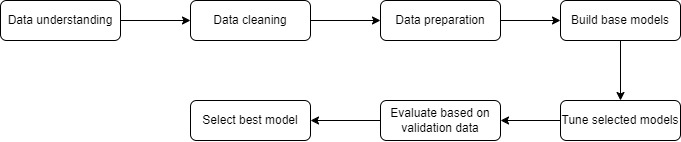

<a id='table_of_contents'></a>

1. [Import libraries](#imports)
2. [Import data](#import_data)
3. [Data exploration](#data_exploration)
4. [Data cleaning and preparation](#data_cleaning)
5. [Model training](#model_training)<br>
6. [Tuning](#tuning)<br>
7. [Validation](#validation)<br>

# 1. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [76]:
# Data manipulation and analysis
import pandas as pd  # Pandas: Data manipulation and analysis library

# Data visualization
import matplotlib.pyplot as plt  # Matplotlib: Plotting library
import seaborn as sns  # Seaborn: Statistical data visualization library
import numpy as np  # NumPy: Numerical computing library

# Data preprocessing
from sklearn.preprocessing import LabelEncoder  # Scikit-Learn: Label encoding for categorical variables
from scipy.stats import skew  # SciPy: Computes the skewness of a distribution

# Machine Learning models
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron Neural Network classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes classifier
from imblearn.over_sampling import RandomOverSampler  # Imbalanced data handling: Random Over-sampling

# Model evaluation and selection
from sklearn.model_selection import train_test_split  # Scikit-Learn: Splitting data into train and test sets
from sklearn.metrics import accuracy_score  # Scikit-Learn: Accuracy score metric

# Additional metrics and tools for classification
from sklearn.metrics import roc_curve, auc  # Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC)
from sklearn.preprocessing import label_binarize  # Scikit-Learn: Binarize labels for multilabel classification
from sklearn.multiclass import OneVsRestClassifier  # Scikit-Learn: One-vs-Rest strategy for multilabel classification
from scipy import interp  # SciPy: Interpolation tools
from sklearn.metrics import confusion_matrix  # Scikit-Learn: Confusion matrix for classification
from sklearn.model_selection import GridSearchCV, learning_curve  # Scikit-Learn: Grid search for hyperparameter tuning, learning curve for model evaluation

# Additional metrics for classification
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix  # Scikit-Learn: Classification metrics


# 2. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [77]:
data = pd.read_csv("application_record.csv") 
record = pd.read_csv("credit_record.csv")

C:\Users\Ng Jun Ming\AppData\Local\Temp\ipykernel_7160\1876381718.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  record = pd.read_csv("credit_record.csv")


In [78]:
data.reset_index(drop=True)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2


In [79]:
data['ID'].duplicated().sum()

47

In [80]:
record.reset_index(drop=True)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0.0,X
1,5001711,-1.0,0
2,5001711,-2.0,0
3,5001711,-3.0,0
4,5001712,0.0,C
...,...,...,...
1048573,5150487,-28.0,C
1048574,5150487,-29.0,C
1048575,999,NaN,NaN
1048576,999,NaN,NaN


In [81]:
record['ID'].duplicated().sum()

1002592

In [82]:
record['Determine'] = record['STATUS'].apply(lambda x: 'Yes' if x in ['1','2', '3', '4', '5'] else 'No')
record  =  record.groupby('ID')['Determine'].value_counts().unstack(fill_value=0)
record['approval'] = record.apply(lambda row: 'not_approved' if row['Yes'] < row['No'] else 'approved', axis=1)
record

Determine,No,Yes,approval
ID,,,
999,3,0,not_approved
5001711,4,0,not_approved
5001712,19,0,not_approved
5001713,22,0,not_approved
5001714,15,0,not_approved
...,...,...,...
5150482,18,0,not_approved
5150483,18,0,not_approved
5150484,13,0,not_approved


In [83]:
merged_data = pd.merge(data, record, on='ID', how='inner')
merged_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,No,Yes,approval
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2,15,1,not_approved
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2,14,1,not_approved
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2,30,0,not_approved
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1,5,0,not_approved
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1,5,0,not_approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2,8,4,not_approved
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2,6,18,approved
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2,15,18,approved
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2,8,2,not_approved


In [84]:
merged_data.duplicated().sum()

0

In [85]:
columns_to_drop = ['No', 'Yes']
merged_data = merged_data.drop(columns=columns_to_drop, errors='ignore')


# 3. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

- See null
- See outliers
- See class imbalance
- See skewness
- Plot pairplot
- Correlation matrix

In [86]:
columns = merged_data.columns

From the graph below we can tell that in the occupation type column there are a lot of null values which could affect the model. This is because null value represents missing information that otherwise the model will be able to make a better predictions. Thus, the presence of these many null value could greatly affect the performance of the model

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
approval                   0
dtype: int64


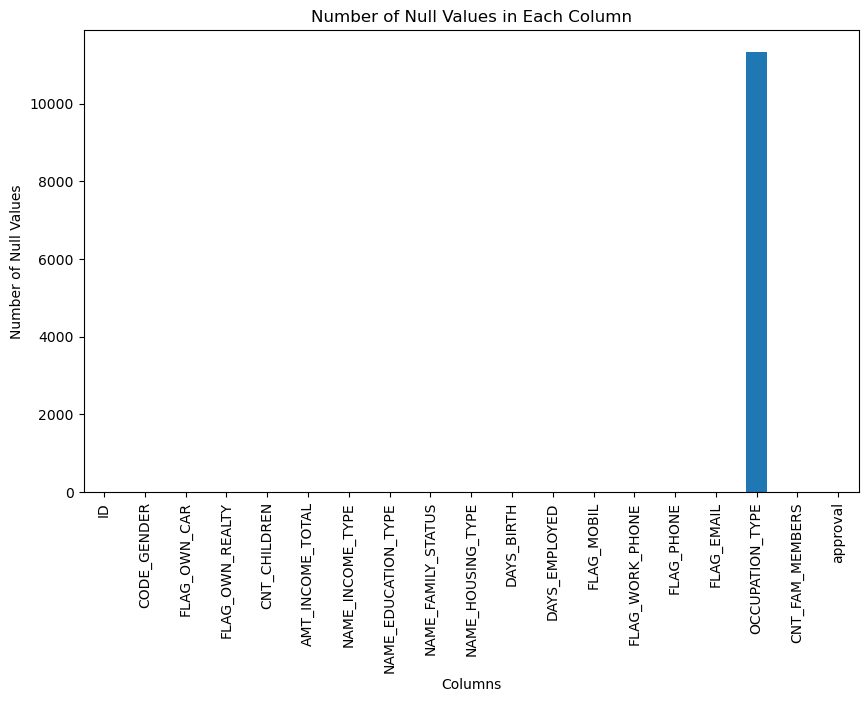

In [87]:
null_counts = merged_data.isnull().sum()
print(null_counts)
# Create a bar plot
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Number of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

From the plot bellow we can see that some columns have a lot of outliers like The icome column. It is important to remove these outliers as they may feed 'false' information to our model, as the model takes into account these outliers that could for example raise the average of the column. Thus, affecting the model's accuracy.

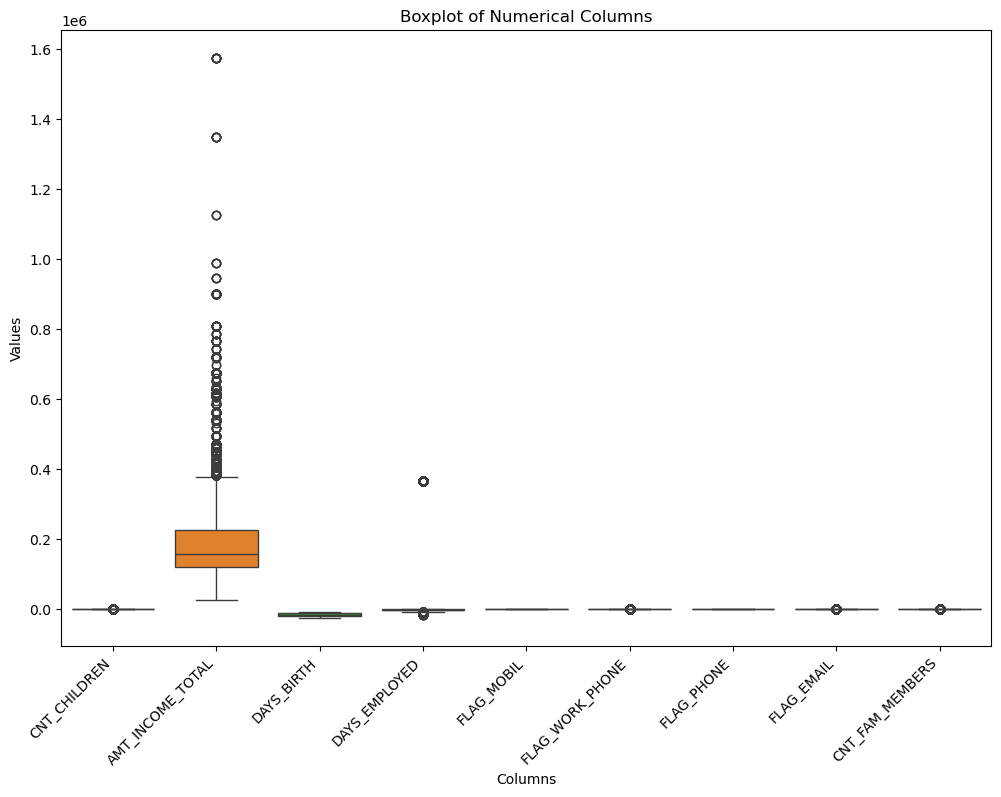

In [88]:
numerical_columns = merged_data.select_dtypes(include=['number']).drop(columns=['ID'])
# Create a box plot for all numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_columns)
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.show()

It is important when building a model that the data are balanced, as we can see from the visual below, the approved class has significantly less than that of the not approved class. This imbalnce of data can lead to the model's performace to decrease. This is because since there is more data on the not_approved, it will perform better on the not_approved class but not as well as the approved class. Since our goal is to see if one is eligible for credit card approval, the prediction of approved is crucial. Thus this is a huge concern.

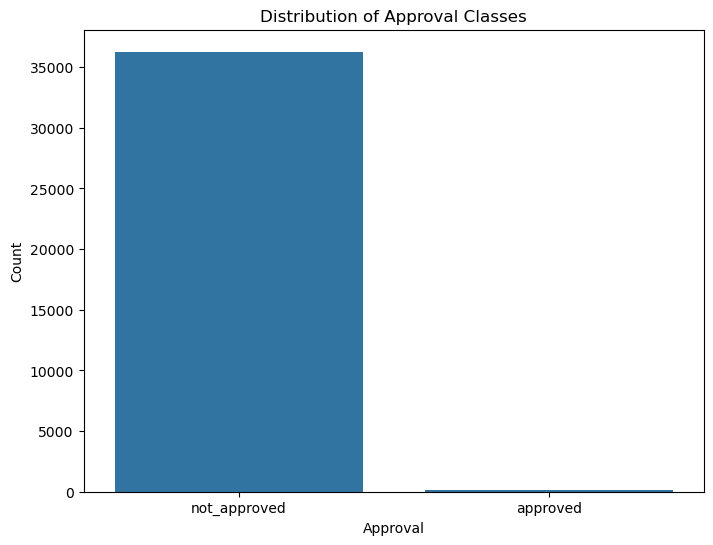

In [89]:
plt.figure(figsize=(8, 6))
sns.countplot(x='approval', data=merged_data)
plt.title('Distribution of Approval Classes')
plt.xlabel('Approval')
plt.ylabel('Count')
plt.show()

From bellow we can see the skewness of each numerical column being calculated and plotted. The skewness tells us about the asymmetry in the distribution of values within a column. A skewness value close to zero indicates a relatively symmetric distribution, while positive skewness suggests a longer tail on the right, and negative skewness implies a longer tail on the left. When the skew value is 0, it is noramlly distributed, the more skew it is the worse it is as it can lead to biasness in the model.

C:\Users\Ng Jun Ming\AppData\Roaming\Python\Python310\site-packages\pandas\core\apply.py:979: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


Skewness of ID: 0.08623874123328233
Skewness of CNT_CHILDREN: 2.5692764853112635
Skewness of AMT_INCOME_TOTAL: 2.738897180151655
Skewness of DAYS_BIRTH: -0.18422206947290823
Skewness of DAYS_EMPLOYED: 1.7723702515885982
Skewness of FLAG_MOBIL: nan
Skewness of FLAG_WORK_PHONE: 1.313498445410343
Skewness of FLAG_PHONE: 0.900024230970696
Skewness of FLAG_EMAIL: 2.8712518014871398
Skewness of CNT_FAM_MEMBERS: 1.298542476962789


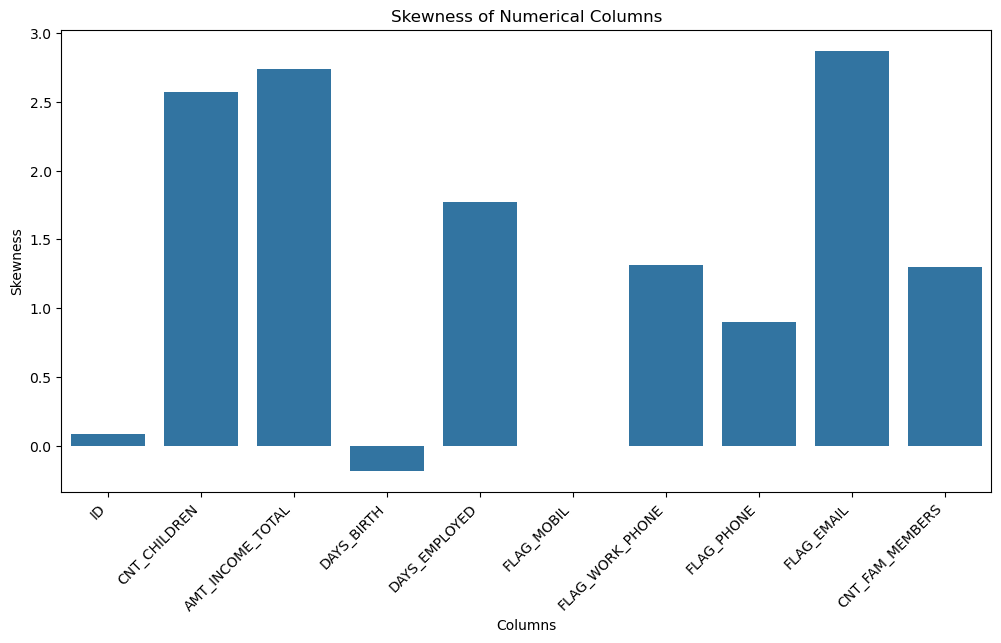

In [90]:
# Calculate skewness for numerical columns
skewness = merged_data.select_dtypes(include=['number']).apply(skew)

# Print skewness for each column
for column, skew_value in skewness.items():
    print(f"Skewness of {column}: {skew_value}")

# Create a bar plot for skewness
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness)
plt.title('Skewness of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

When plotting the individual column distribution, we find that it is generally well spread in the sense of the skew value being low. However, notice that some like FLAG_WORK_PHONE,FLAG_PHONE and FLAG_EMAIL are suppose to be categorical columns thus we will ignore these columns for skewness. However, we notice that the days_birth is in negative, this is because it counts backwards from current day (0), -1 means yesterday. Notice that the Flag_Mobil has a perfect skewness, this is because it only has 1 value which is 1, and it makes the bar very fat.

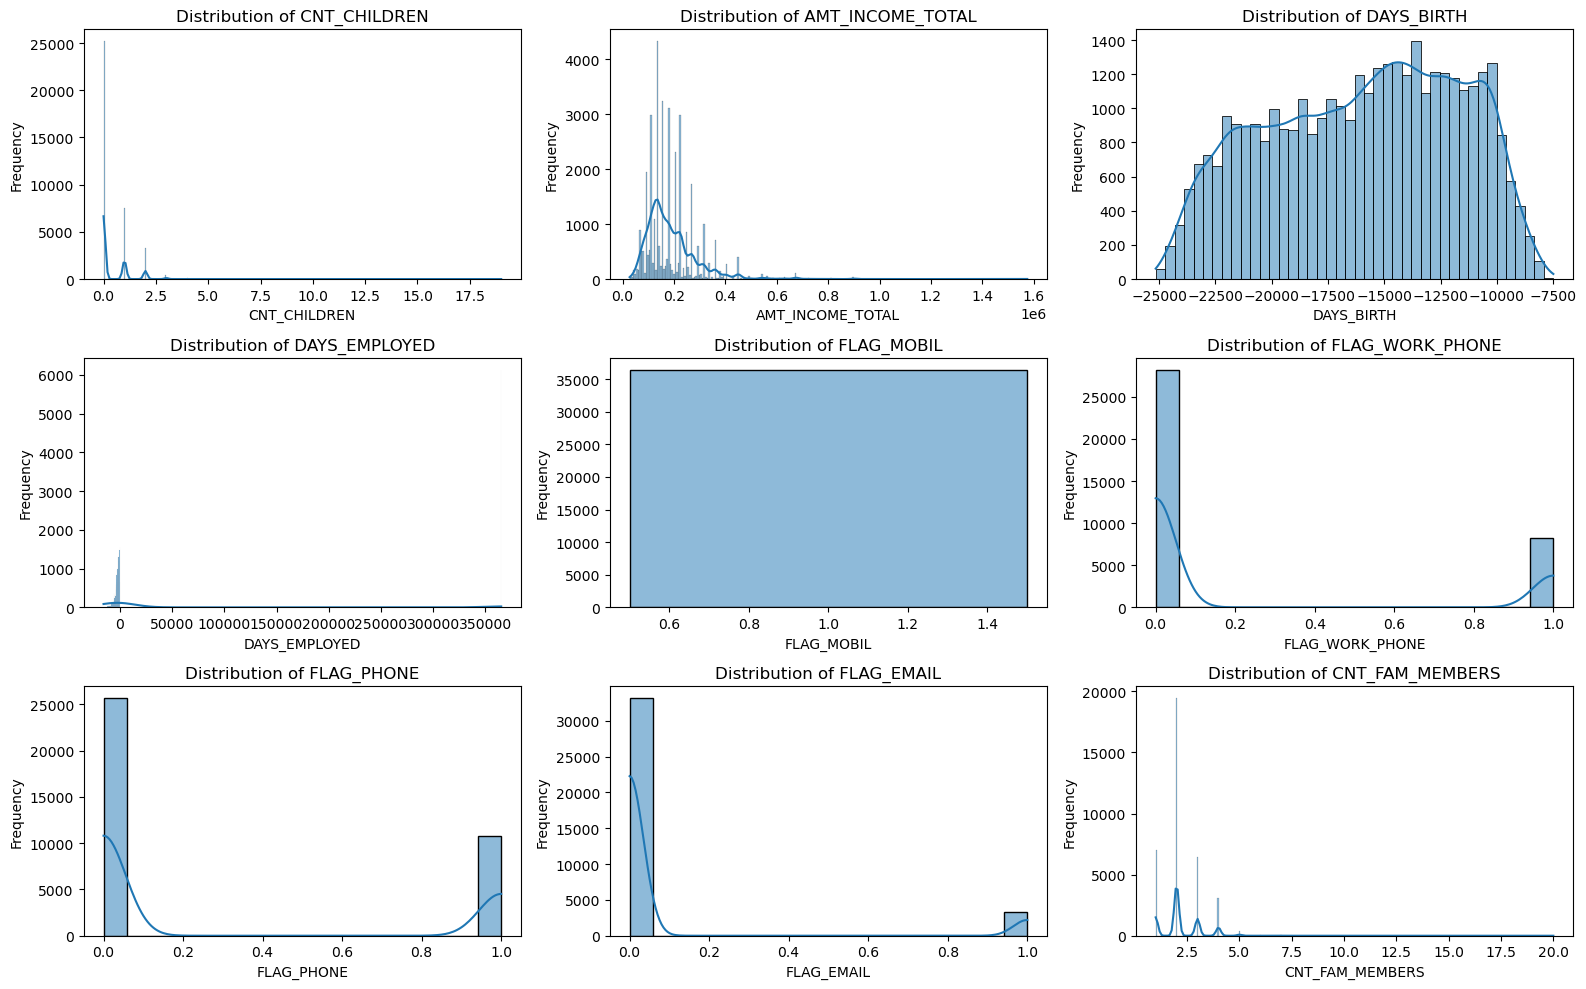

In [91]:
# Plot histograms for each numerical column
plt.figure(figsize=(16, 10))
for column in numerical_columns.columns:
    plt.subplot(3, 3, numerical_columns.columns.get_loc(column) + 1)
    sns.histplot(merged_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Now we will plot a bar graph to understand the categorical columns and what they tell us. We can see that for the code_gender column, that the female has more records than the male. The Flag_own _car has more No than yes, in the name_income_type those who are working there are mroe records and the name_education_type those with higher education have more records and lastly the name_family_status married individuals tend to have more records. In this assignemnt i chose not to balance these data as i feel that these records are justified. For example, those with higher education should in fact be more likely to be given the approval as they are more educated and that those who are working should also get approved as they have a stable source of income. Thus i will leave these categorical data alone as they may capture some underlying relationship. Furthermore, i want the model to take into account these factors by introducing these imbalanced categorical data. As for instance people with higher education tend to have jobs of higher status and pay which provides the bank with a peice of mind as the risk the bank would have to undertake would be lower since the individual has more money.

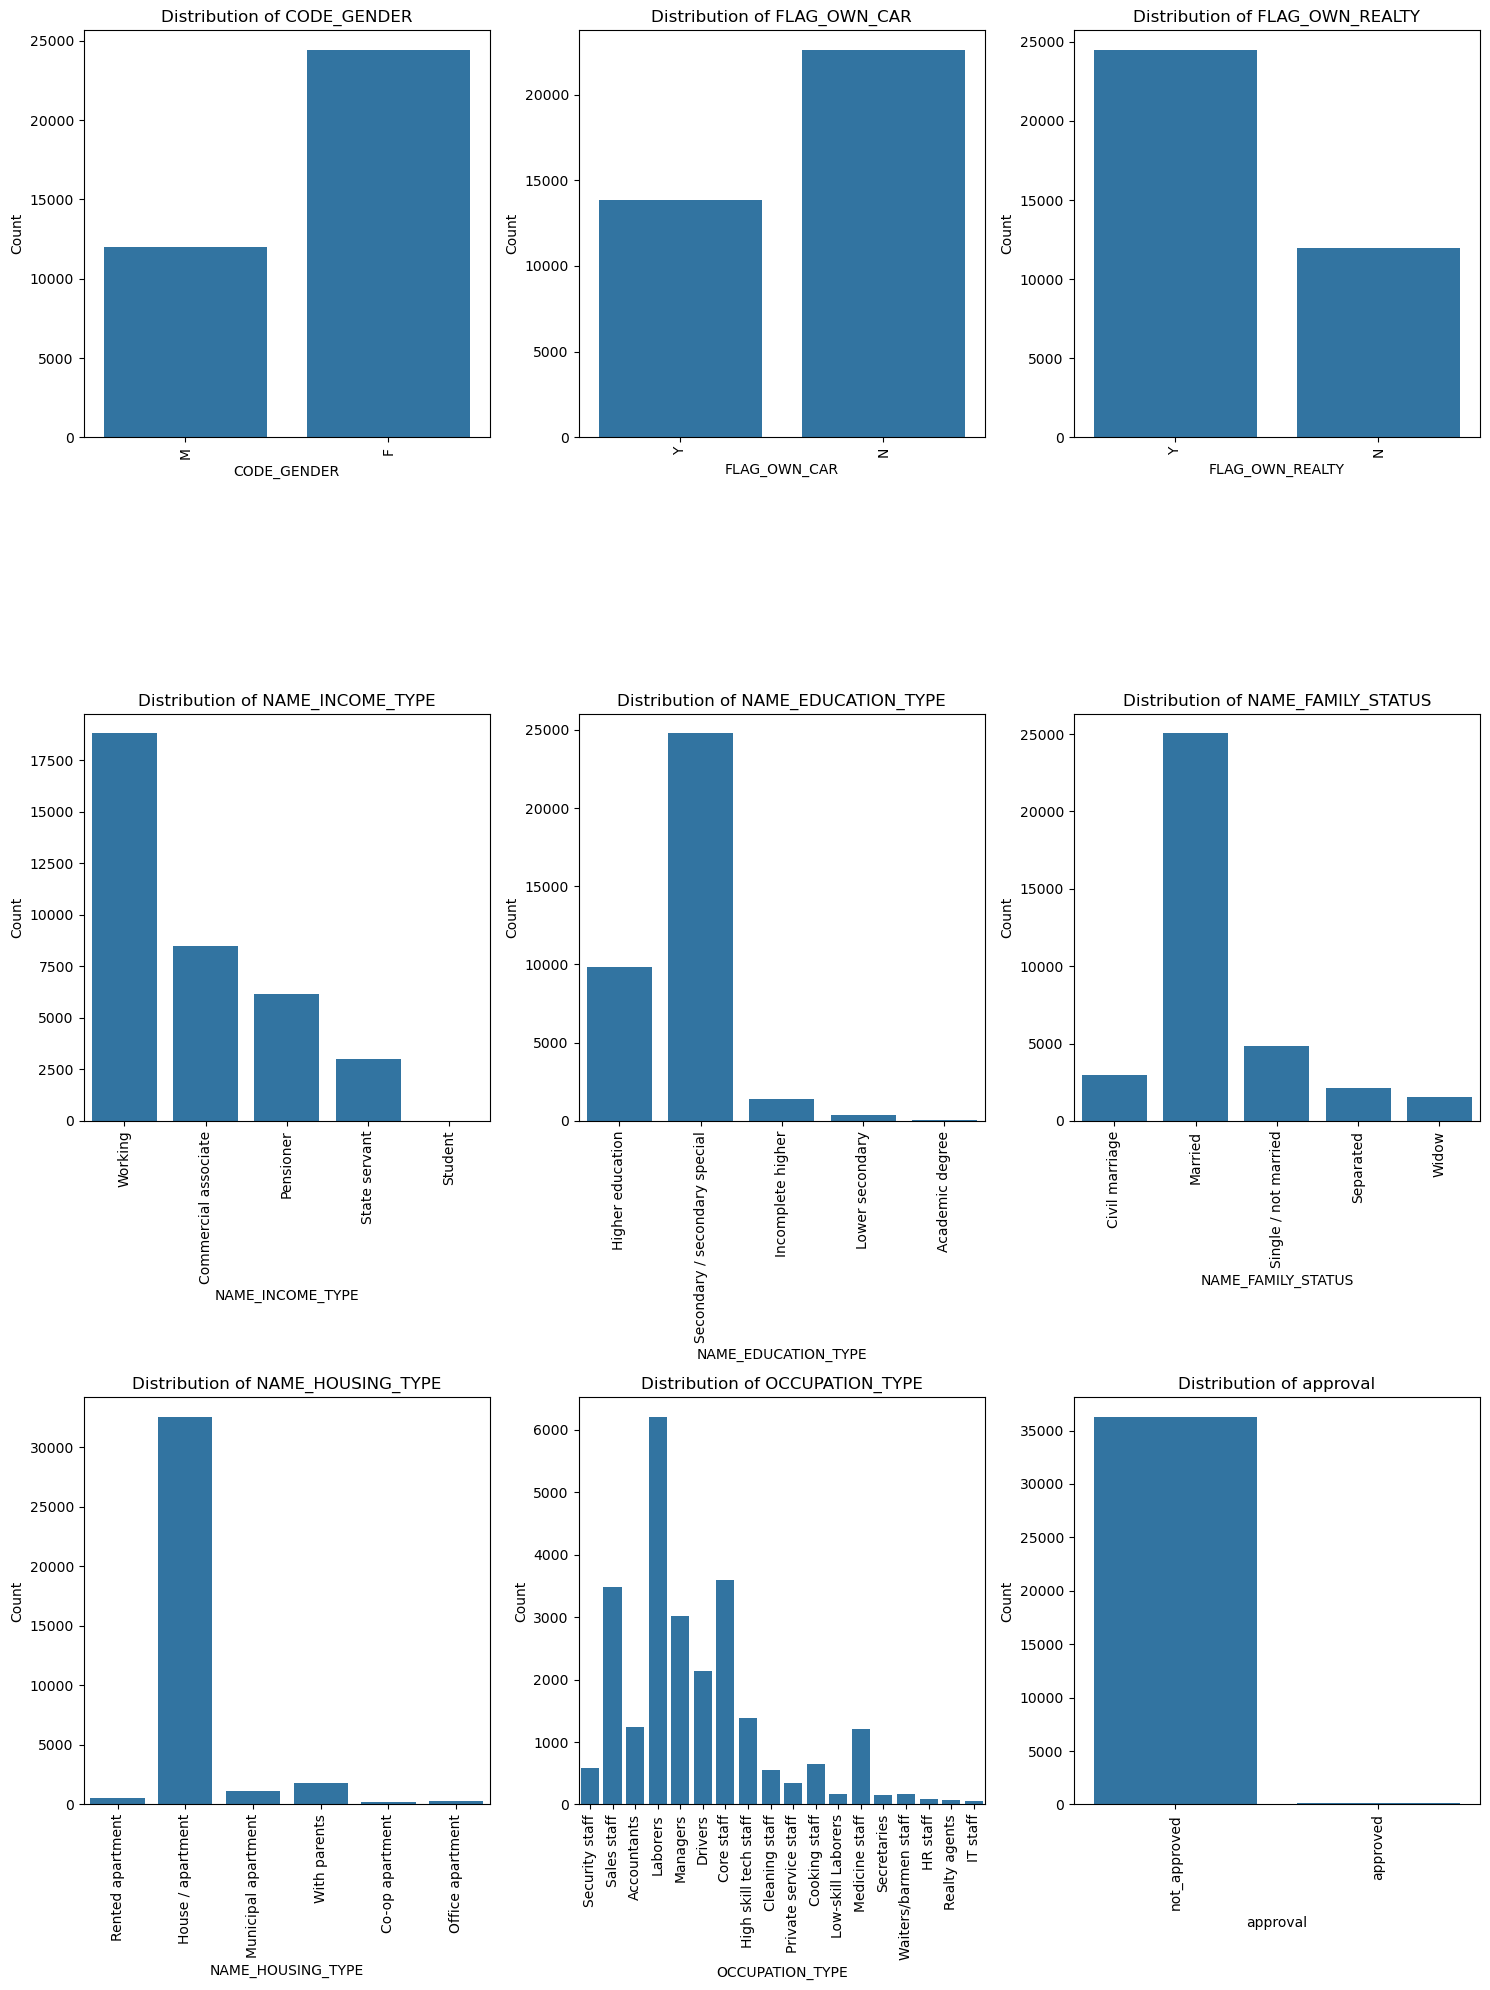

In [92]:
# Select non-numerical columns
non_numerical_columns = merged_data.select_dtypes(exclude=['number'])

# Plot count plots for each non-numerical column
plt.figure(figsize=(15, 20))
for i, column in enumerate(non_numerical_columns.columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, data=merged_data)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

It does not seem to have any distinction based on amount total, days birth and the approval. However, we can notice that bellow 0.6 * 1e6 is where all the approved individuals tend to be Additionally, the age of the individual does not seem to matter a lot when it comes to approval.

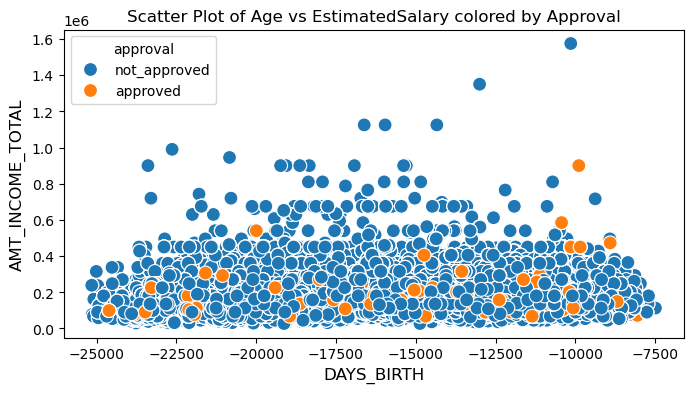

In [93]:
plt.figure(figsize=(8, 4))
plt.title('Scatter Plot of Age vs EstimatedSalary colored by Approval', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('DAYS_BIRTH', fontsize=12)
plt.ylabel('AMT_INCOME_TOTAL', fontsize=12)

sns.scatterplot(data=merged_data, x='DAYS_BIRTH', y='AMT_INCOME_TOTAL', hue='approval', s=100)

plt.show()

Plotting a pairplot to find any trends. It is hard to tell about the relation due to the imbalance data. However there are noticable trends such as it seems that those with more children and family members tend not be be approved, those with a lot of children and not a lot of income tend to be not approved.

<Figure size 1500x2000 with 0 Axes>

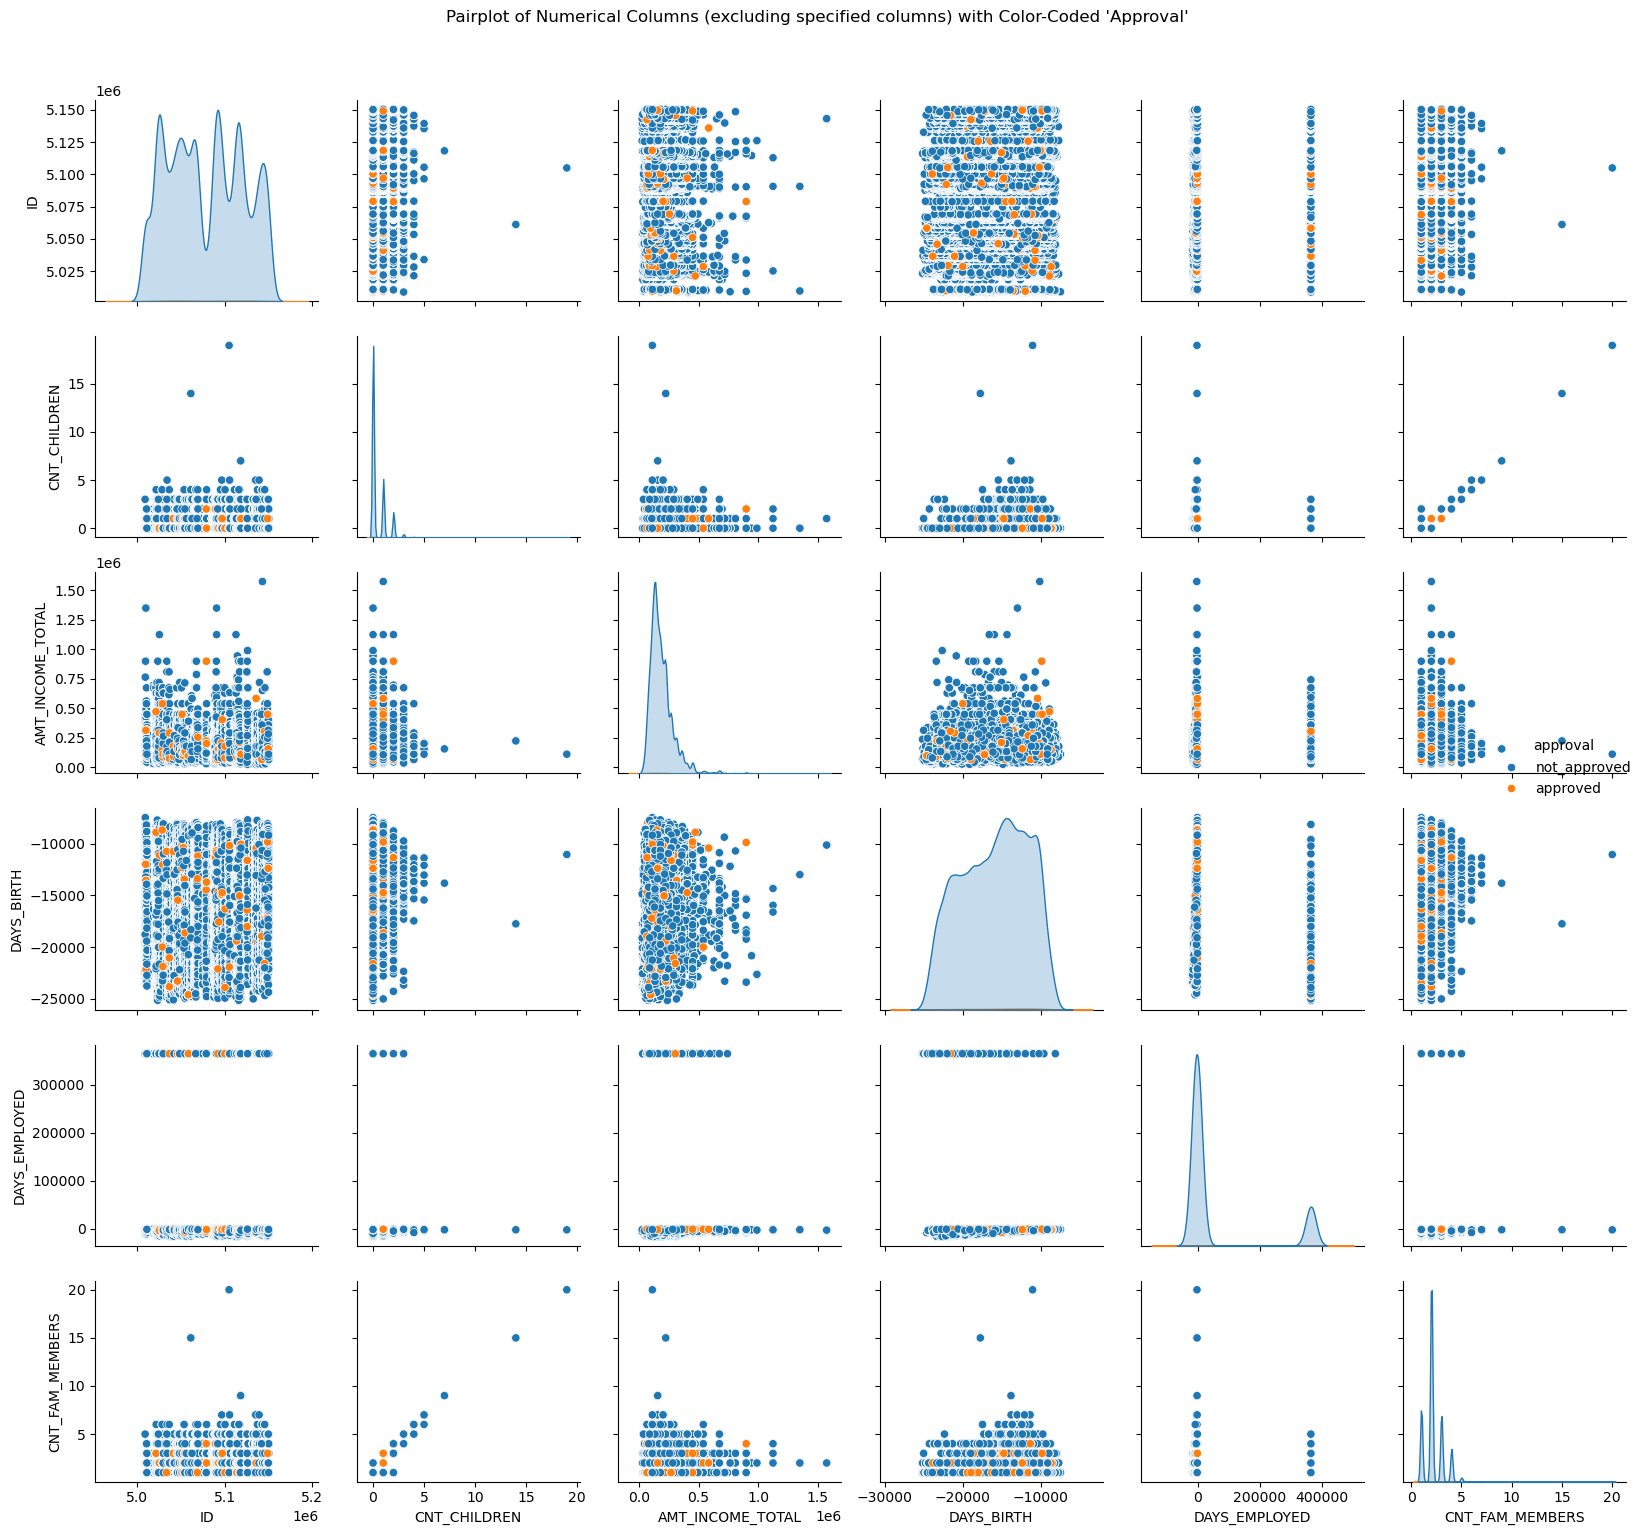

In [94]:
numerical_columns = merged_data.select_dtypes(include=['number'])
columns_to_remove = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
numerical_columns_filtered = numerical_columns.drop(columns=columns_to_remove, errors='ignore')

# Concatenate numerical columns with 'approval'
data_with_approval = pd.concat([numerical_columns_filtered, merged_data['approval']], axis=1)

# Set a larger figure size
plt.figure(figsize=(15, 20))

sns.pairplot(data_with_approval, hue='approval')

# Adjust plot title and show
plt.suptitle("Pairplot of Numerical Columns (excluding specified columns) with Color-Coded 'Approval'", y=1.02)
plt.tight_layout()
plt.show()

Now we plot a correlation graph, this allows us to see how one column affects another. Should any columns be highly correlated, they should be removed as they may cause multicolinearity. We will determine high correlation as above 0.7 or bellow -0.7. In this case, we do not need to remove any of the column as none of them are highly correlated. However the count children column and the count family column seems to be highly correlated. This is bad as it can cause the model's training to be eratic and thus reducing the performance of the model.

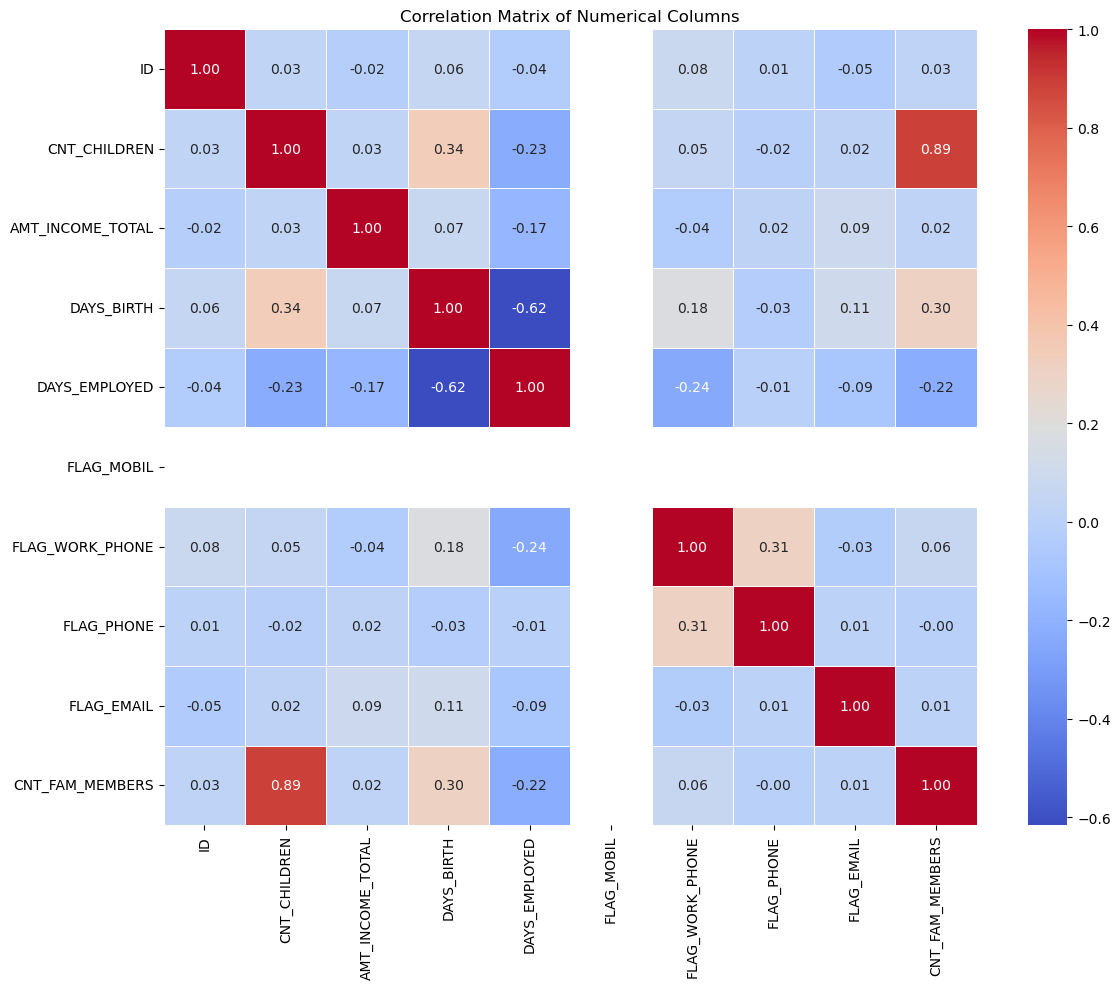

In [95]:
# Calculate the correlation matrix for numerical columns
correlation_matrix_numerical = numerical_columns.corr()

# Create a heatmap for the correlation matrix of numerical columns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_numerical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.tight_layout()
plt.show()

# 4. Data cleaning and preparation <a id='data_cleaning'></a>
[Back to top](#table_of_contents)
- getting rid of missing value
- removing outliers from numeric columns
- Remove highly correlated columns 
- Encode categorical columns
- Solve class imbalance


As discussed earlier, missing data affects the model's performace in a negative way. Thus we will remove all the rows with missig data in it.

In [96]:
merged_data_no_missing = merged_data.dropna()
print("\nCount of missing values after removal:")
print(merged_data_no_missing.isna().sum())


Count of missing values after removal:
ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
approval               0
dtype: int64


Now we plot the outliers for each of the numerical columns. This is done so by taking the interquartile range and multiplying it by 1.5, anything out of that 1.5 interquartile range would be considered an outlier. From below, only the days_birth column those not have outliers whereas the rest of the numerical columns have outliers.

In [97]:
# Calculate the IQR for each numerical column
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

# Identify and remove rows with outliers
outliers_removed_data = merged_data_no_missing[~((numerical_columns < (Q1 - threshold * IQR)) | (numerical_columns > (Q3 + threshold * IQR))).any(axis=1)]

# Print information about the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers using IQR method:", outliers_removed_data.shape)

Shape of DataFrame after removing outliers using IQR method: (14250, 19)


C:\Users\Ng Jun Ming\AppData\Local\Temp\ipykernel_7160\3136953589.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers_removed_data = merged_data_no_missing[~((numerical_columns < (Q1 - threshold * IQR)) | (numerical_columns > (Q3 + threshold * IQR))).any(axis=1)]


As discussed highly correlated columns should be removed due to the eratic behaviour. Thus, we will remove the children column isntead of the family column as the familiy encompasses every family member instead of just childrens. This step falls under feature engineering.

In [98]:
# Drop the 'CNT_CHILDREN' column
outliers_removed_data_no_children = outliers_removed_data.drop(columns='CNT_CHILDREN', errors='ignore')

# Print information about the DataFrame after removing the 'CNT_CHILDREN' column
print("Shape of DataFrame after removing 'CNT_CHILDREN' column:", outliers_removed_data_no_children.shape)

Shape of DataFrame after removing 'CNT_CHILDREN' column: (14250, 18)


Computers are not good at dealing with words, thus we need to encode the categorical columns as they deal with numbers better.

In [99]:
from sklearn.preprocessing import label_binarize

# Select columns for one-hot encoding
columns_to_encode = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                      'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
                      'FLAG_EMAIL', 'OCCUPATION_TYPE']

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(outliers_removed_data_no_children[columns_to_encode], drop_first=True)

# Drop the original categorical columns from the DataFrame and assign the result back
outliers_removed_data_encoded = outliers_removed_data_no_children.drop(columns=columns_to_encode)

# Concatenate the one-hot encoded columns with the original DataFrame
outliers_removed_data_encoded = pd.concat([outliers_removed_data_encoded, one_hot_encoded], axis=1)

# Binarize the 'approval' column
outliers_removed_data_encoded['approval'] = label_binarize(outliers_removed_data_encoded['approval'], classes=['not_approved', 'approved'])

# Print information about the DataFrame after one-hot encoding and label binarization
print("Shape of DataFrame after one-hot encoding and label binarization:", outliers_removed_data_encoded.shape)


Shape of DataFrame after one-hot encoding and label binarization: (14250, 47)


In [100]:
outliers_removed_data_encoded

,ID,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,approval,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
2,5008806,112500.0,-21474,-1134,2,0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
12,5008819,135000.0,-17778,-1194,2,0,1,0,0,0,...,True,False,False,False,False,False,False,False,False,False
13,5008820,135000.0,-17778,-1194,2,0,1,0,0,0,...,True,False,False,False,False,False,False,False,False,False
14,5008821,135000.0,-17778,-1194,2,0,1,0,0,0,...,True,False,False,False,False,False,False,False,False,False
15,5008822,135000.0,-17778,-1194,2,0,1,0,0,0,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36443,5149041,180000.0,-19750,-3608,2,0,1,0,0,0,...,True,False,False,False,False,False,False,False,False,False
36444,5149042,180000.0,-19750,-3608,2,0,1,0,0,0,...,True,False,False,False,False,False,False,False,False,False
36452,5149828,315000.0,-17348,-2420,2,0,1,0,0,0,...,False,False,True,False,False,False,False,False,False,False
36455,5150049,283500.0,-17958,-655,2,0,1,0,0,0,...,False,False,False,False,False,False,True,False,False,False


Dealing with the imbalanced data by using oversampling to make the data balance.

In [101]:
# Separate features (X) and target variable (y)
X = outliers_removed_data_encoded.drop(columns='approval')
y = outliers_removed_data_encoded['approval']

# Split the resampled data into training (70%), testing (15%), and validation (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Oversample the data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train_resampled.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_valid:", X_valid.shape)
print("Shape of y_train:", y_train_resampled.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_valid:", y_valid.shape)

Shape of X_train: (19864, 46)
Shape of X_test: (2137, 46)
Shape of X_valid: (2138, 46)
Shape of y_train: (19864,)
Shape of y_test: (2137,)
Shape of y_valid: (2138,)


In [102]:
combined_train_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)


We can tell that individuals that have lived for more than 20000 days (roughly 55 years old) tend to not be granted the credit card approval, despite the amount of money they make. Those who earned above 300,000 a year also tend to not get approved.

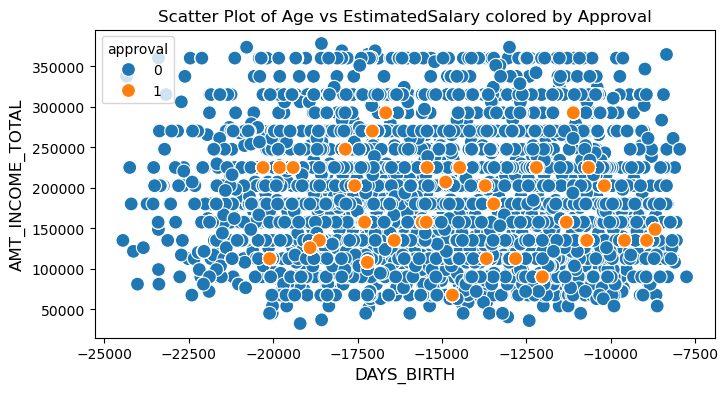

In [103]:
plt.figure(figsize=(8, 4))
plt.title('Scatter Plot of Age vs EstimatedSalary colored by Approval', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('DAYS_BIRTH', fontsize=12)
plt.ylabel('AMT_INCOME_TOTAL', fontsize=12)

sns.scatterplot(data=combined_train_data, x='DAYS_BIRTH', y='AMT_INCOME_TOTAL', hue='approval', s=100)

plt.show()

We can see that all the columns are in true and false. This is becuase we done encoding onto the columns. However we can still derive insights. For example, people in office apartment are more likely to get approved and medicien staffs are also more liekly to get approved.

In [127]:
non_numerical_columns = combined_train_data.select_dtypes(exclude=['number'])
non_numerical_columns

,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19859,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19860,True,True,True,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
19861,True,False,True,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
19862,True,True,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False


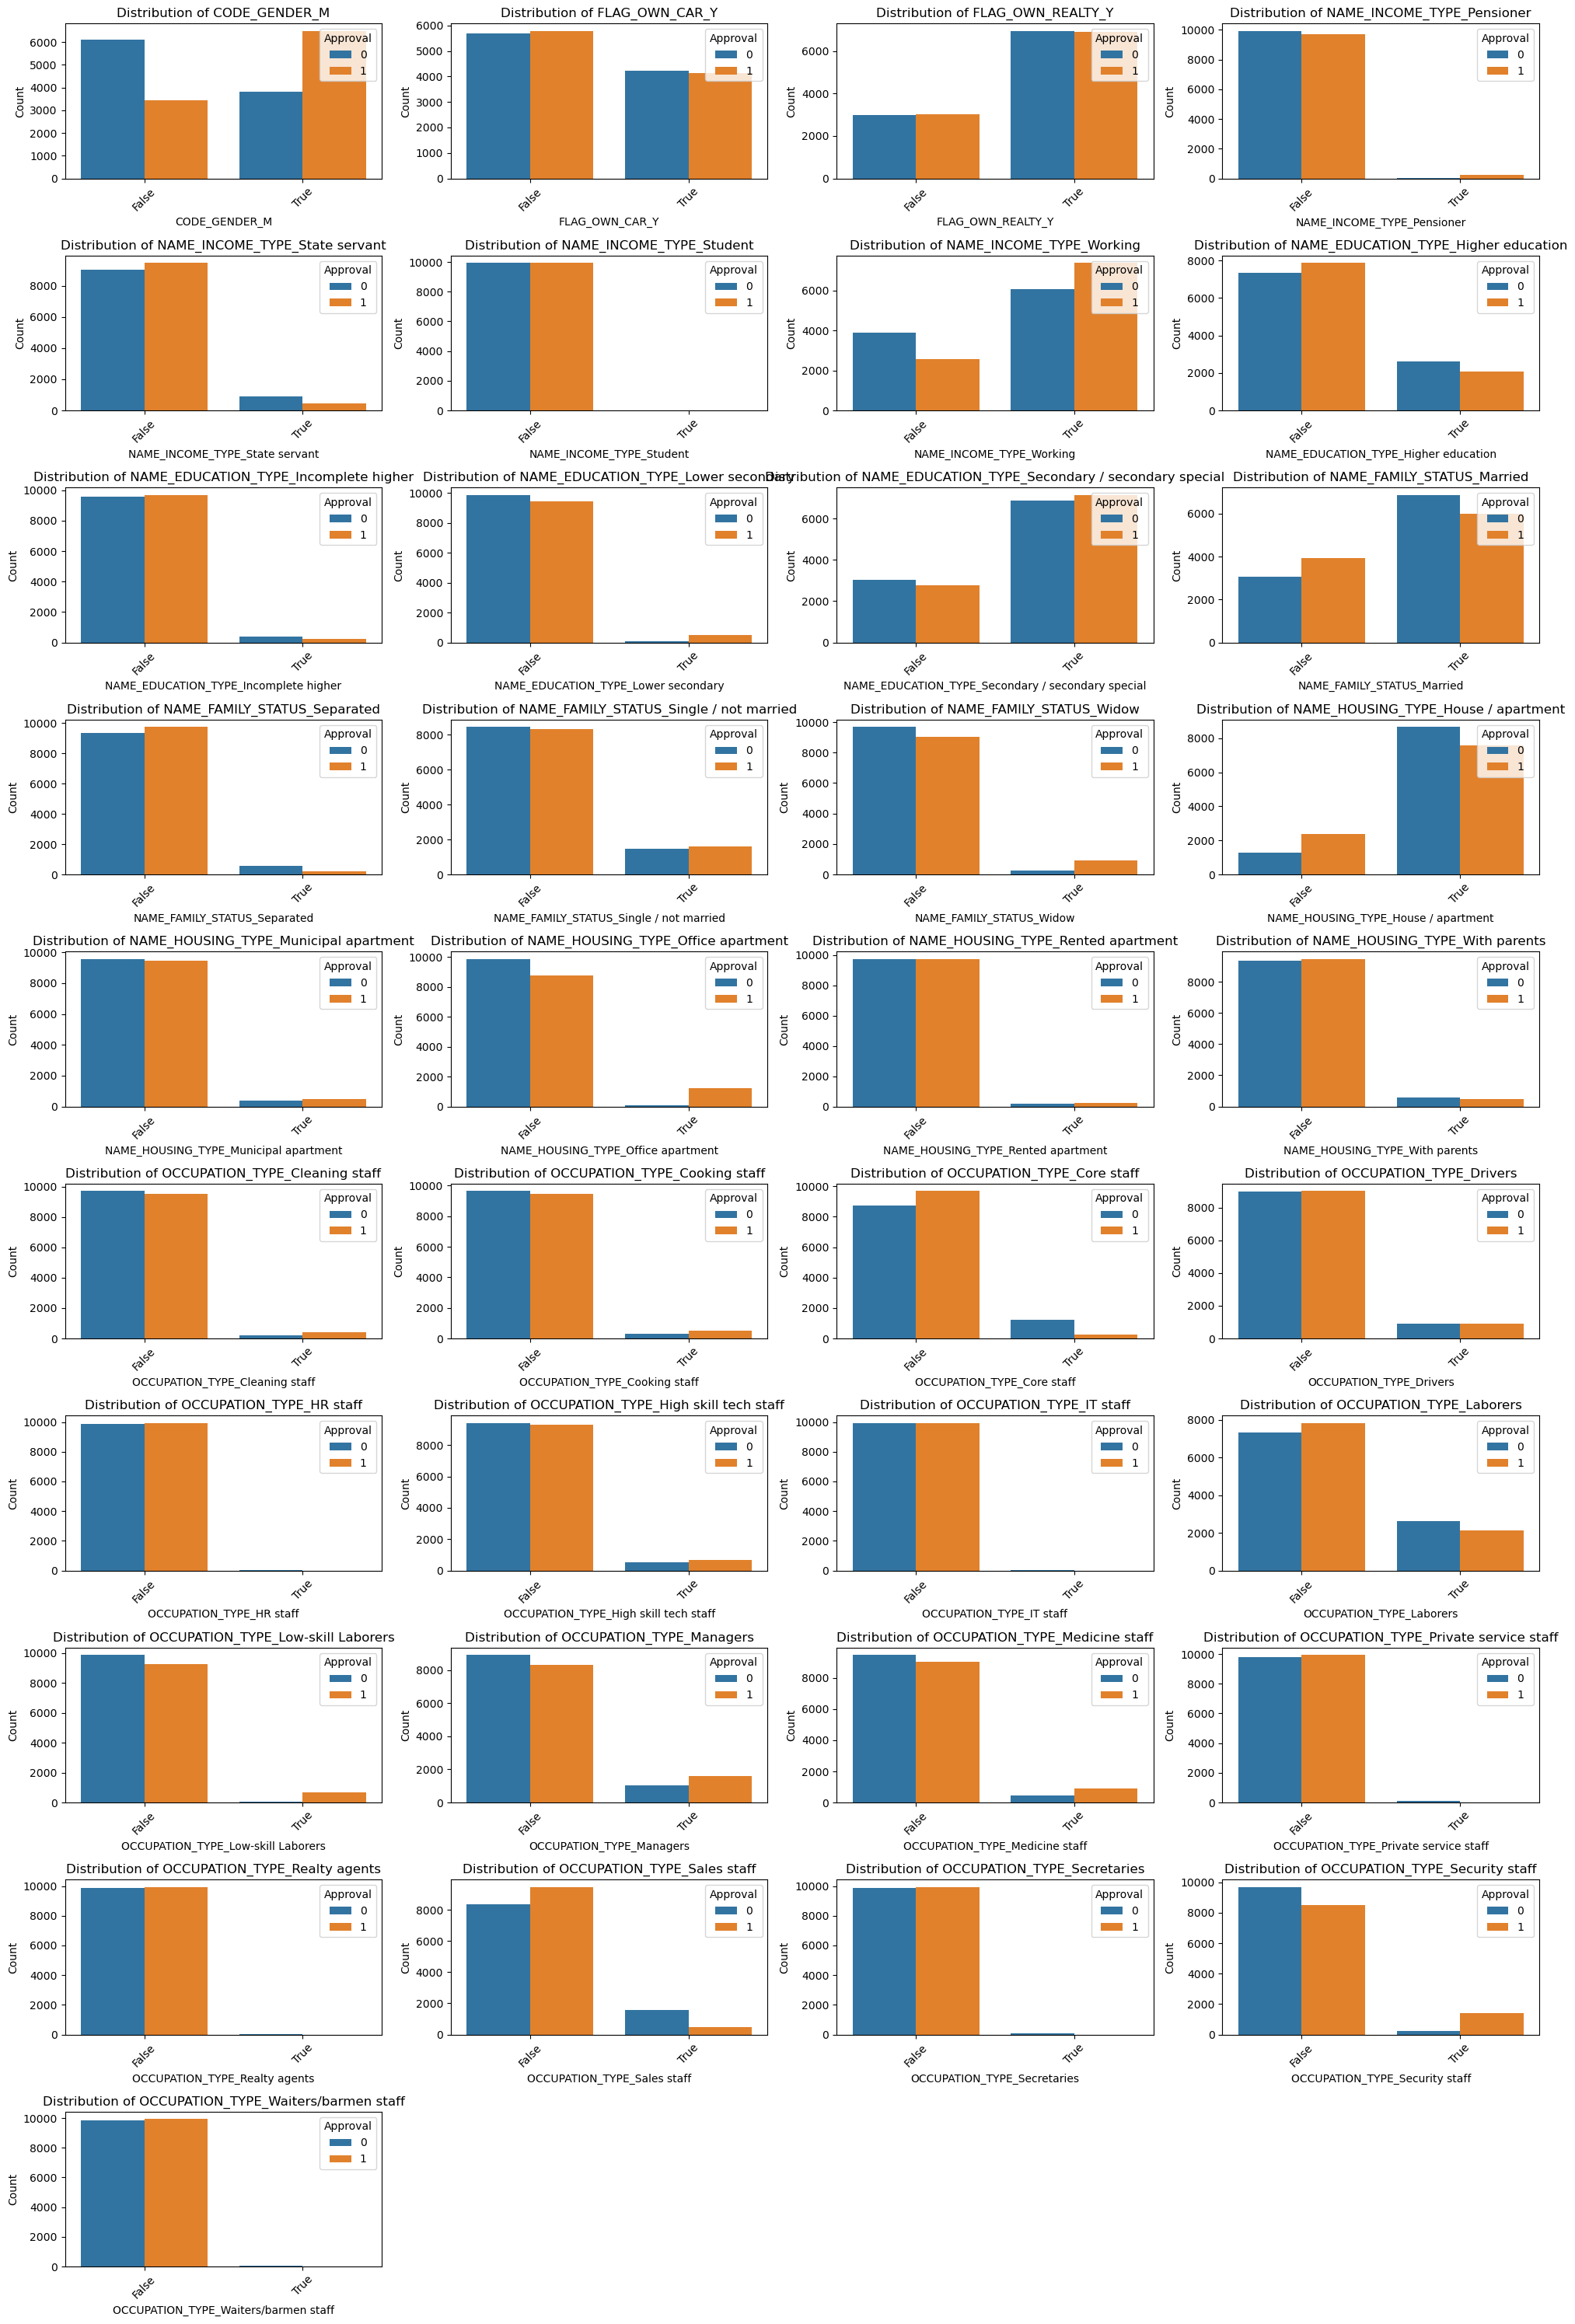

In [130]:
num_rows = 10
num_cols = 4

total_subplots = non_numerical_columns.shape[1]

plt.figure(figsize=(20, 30))

for i, column in enumerate(non_numerical_columns.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    
    sns.countplot(x=column, hue='approval', data=combined_train_data)
    
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45) 
    plt.legend(title='Approval', loc='upper right') 

plt.tight_layout()

plt.show()

# 5. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

#### Neural Network (MLPClassifier)
- **Description:** A neural network is a computational model inspired by the way biological neural networks in the human brain work. MLP (Multi-Layer Perceptron) is a type of artificial neural network with an input layer, one or more hidden layers, and an output layer.
- **How it works:** It learns by adjusting weights to minimize the difference between predicted and actual outcomes. The hidden layers allow the model to learn complex relationships in the data.

#### Decision Tree (DecisionTreeClassifier)
- **Description:** Decision trees are tree-like models where each internal node represents a decision based on an attribute, each branch represents the outcome of the decision, and each leaf node represents the final outcome.
- **How it works:** It recursively splits the data based on features to create a tree structure, making decisions at each node. It's interpretable and can handle both numerical and categorical data.

#### Logistic Regression (LogisticRegression)
- **Description:** Despite its name, logistic regression is a classification algorithm used for binary and multiclass classification problems. It models the probability of a binary outcome as a logistic function.
- **How it works:** It estimates the probability that a given instance belongs to a particular category. The logistic function maps any input into values between 0 and 1, making it suitable for binary classification.

#### Random Forest (RandomForestClassifier)
- **Description:** Random Forest is an ensemble method that builds multiple decision trees and merges them together to get a more accurate and stable prediction.
- **How it works:** It creates a forest of decision trees, each trained on a random subset of the data. The final prediction is often an average or vote of the predictions of individual trees, providing improved accuracy and robustness.

#### Support Vector Machine (SVM)
- **Description:** SVM is a powerful classification algorithm that works by finding the hyperplane that best separates different classes in the feature space.
- **How it works:** SVM finds the hyperplane with the maximum margin between classes, where the margin is the distance between the hyperplane and the nearest data point from each class. It can handle both linear and non-linear decision boundaries.

#### Gradient Boosting (GradientBoostingClassifier)
- **Description:** Gradient Boosting is an ensemble technique that builds a series of weak learners (usually decision trees) sequentially, with each new learner correcting the errors of the previous ones.
- **How it works:** It fits a series of models to the data, and each new model focuses on the mistakes made by the previous ones. It combines their predictions to reduce the overall error.

#### K-Nearest Neighbors (KNeighborsClassifier)
- **Description:** K-Nearest Neighbors is a simple and intuitive classification algorithm based on the idea that similar instances tend to belong to the same class.
- **How it works:** It classifies a data point based on the majority class of its k-nearest neighbors. The choice of k and the distance metric are critical parameters.

#### Naive Bayes (GaussianNB)
- **Description:** Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem with the assumption of independence between features.
- **How it works:** It calculates the probability of each class given a set of features and selects the class with the highest probability. Despite its "naive" assumption, it often performs well and is efficient.

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Neural Network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_resampled, y_train_resampled)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42, probability = True)
svm_model.fit(X_train_resampled, y_train_resampled)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [30]:
from sklearn.metrics import classification_report

# Function to print classification report
def print_classification_report(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print("Classification Report for {}:\n".format(model_name))
    print(classification_report(y_test, y_pred, zero_division=1))

# Neural Network
print_classification_report(nn_model, X_test, y_test, 'Neural Network')

# Decision Tree
print_classification_report(dt_model, X_test, y_test, 'Decision Tree')

# Logistic Regression
print_classification_report(lr_model, X_test, y_test, 'Logistic Regression')

# Random Forest
print_classification_report(rf_model, X_test, y_test, 'Random Forest')

# Support Vector Machine (SVM)
print_classification_report(svm_model, X_test, y_test, 'Support Vector Machine (SVM)')

# Gradient Boosting
print_classification_report(gb_model, X_test, y_test, 'Gradient Boosting')

# K-Nearest Neighbors (KNN)
print_classification_report(knn_model, X_test, y_test, 'K-Nearest Neighbors (KNN)')

# Naive bayes (NB)
print_classification_report(nb_model, X_test, y_test, 'Naive bayes (KNN)')

Classification Report for Neural Network:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2128
           1       1.00      0.00      0.00         9

    accuracy                           1.00      2137
   macro avg       1.00      0.50      0.50      2137
weighted avg       1.00      1.00      0.99      2137

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2128
           1       0.00      0.00      1.00         9

    accuracy                           0.99      2137
   macro avg       0.50      0.50      1.00      2137
weighted avg       0.99      0.99      1.00      2137

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      0.47      0.64      2128
           1       0.01      0.78      0.01         9

    accuracy                           0.47      

C:\Users\Ng Jun Ming\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Ng Jun Ming\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Classification Report for K-Nearest Neighbors (KNN):

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2128
           1       0.00      0.00      1.00         9

    accuracy                           0.99      2137
   macro avg       0.50      0.50      1.00      2137
weighted avg       0.99      0.99      0.99      2137

Classification Report for Naive bayes (KNN):

              precision    recall  f1-score   support

           0       0.99      0.47      0.64      2128
           1       0.00      0.22      0.00         9

    accuracy                           0.47      2137
   macro avg       0.50      0.35      0.32      2137
weighted avg       0.99      0.47      0.64      2137



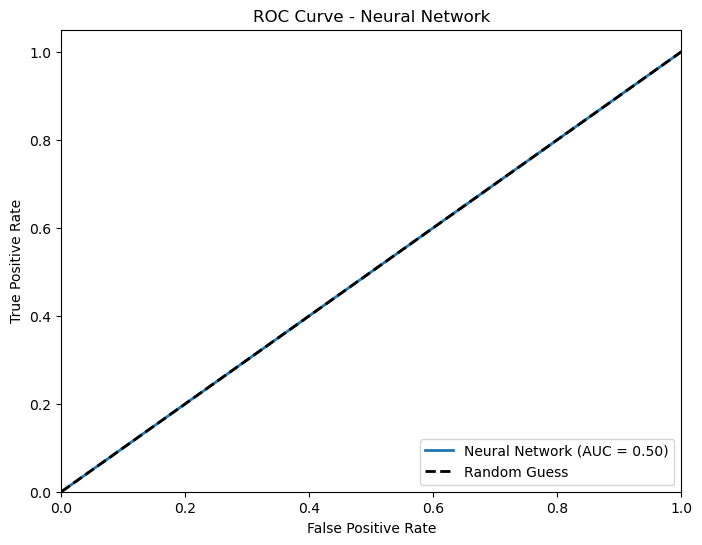

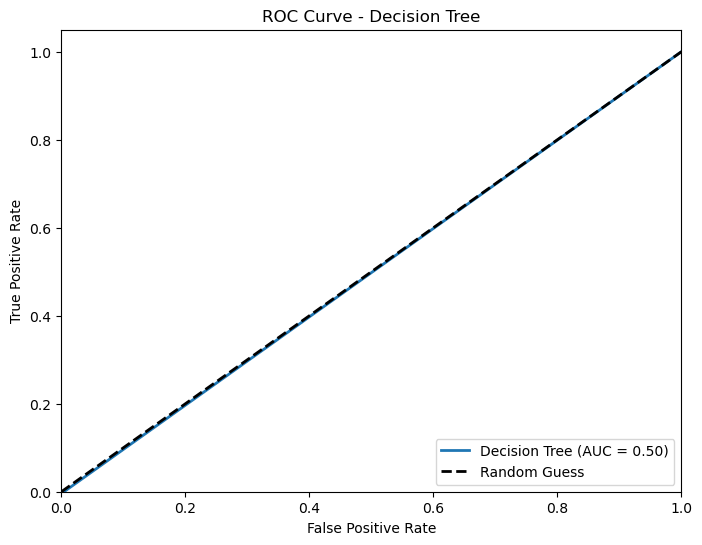

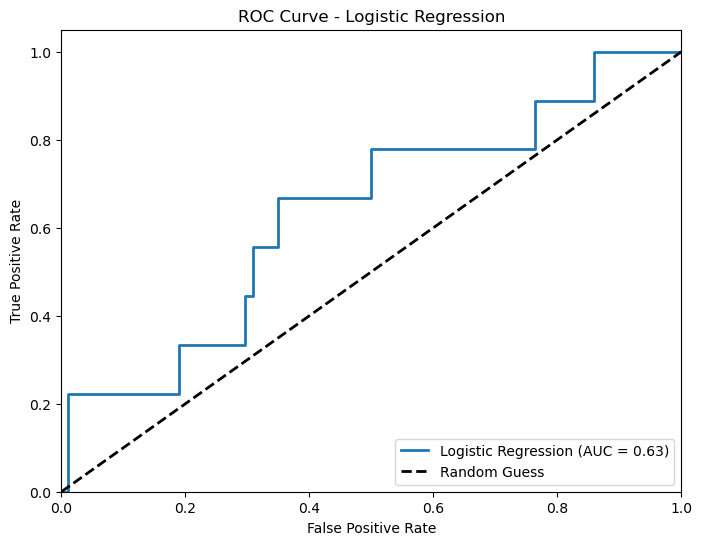

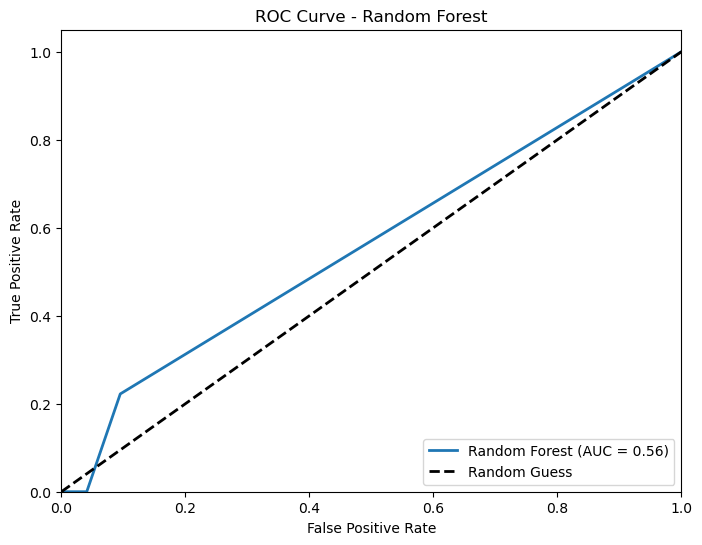

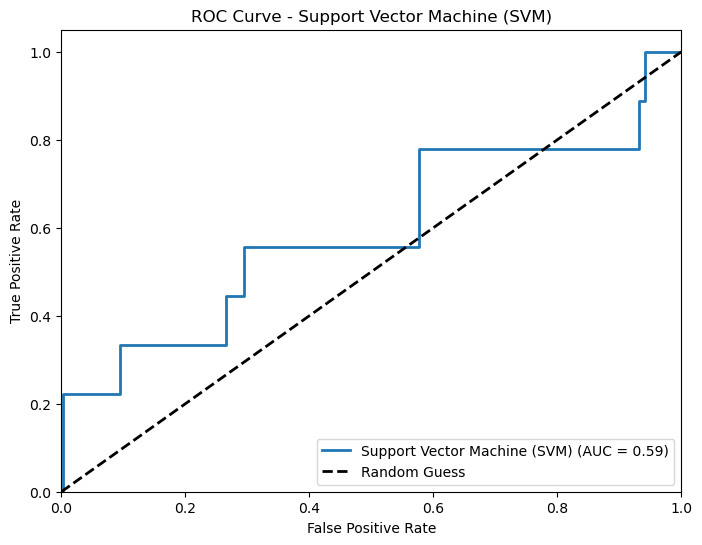

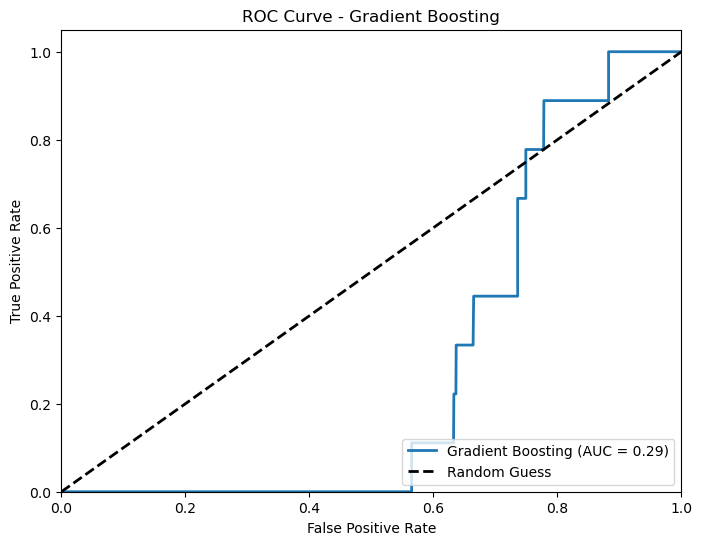

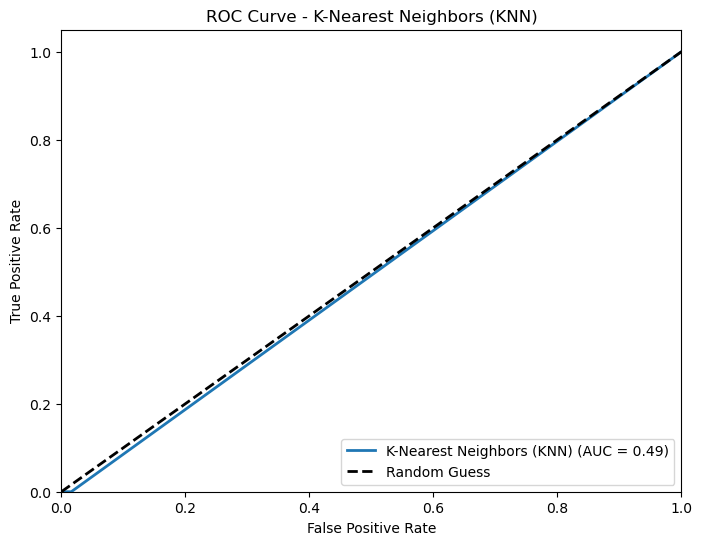

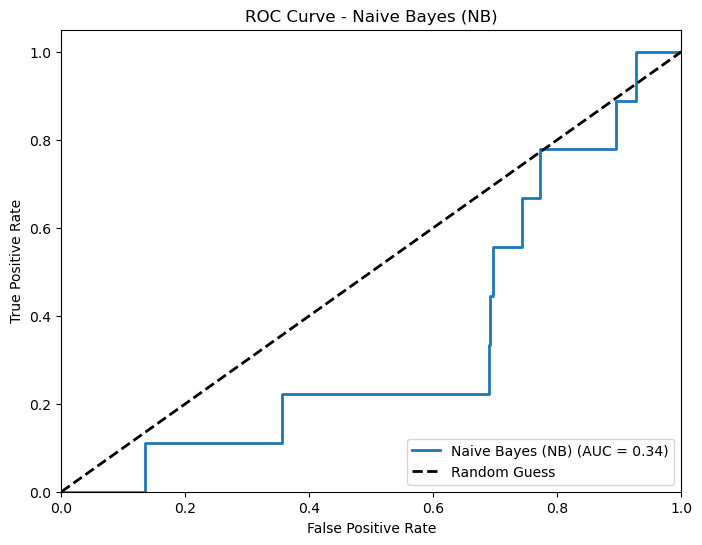

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label='{} (AUC = {:.2f})'.format(model_name, roc_auc))
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')

    # Customize plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for all models separately
plot_roc_curve(nn_model, X_test, y_test, 'Neural Network')
plot_roc_curve(dt_model, X_test, y_test, 'Decision Tree')
plot_roc_curve(lr_model, X_test, y_test, 'Logistic Regression')
plot_roc_curve(rf_model, X_test, y_test, 'Random Forest')
plot_roc_curve(svm_model, X_test, y_test, 'Support Vector Machine (SVM)')
plot_roc_curve(gb_model, X_test, y_test, 'Gradient Boosting')
plot_roc_curve(knn_model, X_test, y_test, 'K-Nearest Neighbors (KNN)')
plot_roc_curve(nb_model, X_test, y_test, 'Naive Bayes (NB)')

# 6. Tuning <a id='tuning'></a>

[Back to top](#table_of_contents)

### Models picked for tuning and why

#### 1. K-Nearest Neighbors (KNN):
- **Precision and Recall:**
  - Precision for Class 0 is high (1.00), indicating a low false positive rate.
  - Recall for Class 0 is also high (0.99), showing good identification of positive instances.
  - Struggles with Class 1, as precision and recall are both 0.00.
- **F1-Score:**
  - High F1-score for Class 0 but 1.00 for Class 1 due to imbalanced data.
- **Accuracy:**
  - Overall accuracy is high (0.99) but driven by the dominant class.

#### 2. Neural Network:
- **Precision and Recall:**
  - High precision and recall for Class 0 (1.00), indicating accurate and complete identification.
  - Struggles with Class 1, as precision is high (1.00) but recall is 0.00.
- **F1-Score:**
  - High F1-score for Class 0 but 0.00 for Class 1, reflecting imbalanced performance.
- **Accuracy:**
  - Overall accuracy is high (1.00) due to accurate predictions for the dominant class.

#### 3. Decision Tree:
- **Precision and Recall:**
  - High precision and recall for Class 0 (1.00), indicating accurate identification.
  - Struggles with Class 1, as precision is 0.00, and recall is 0.00.
- **F1-Score:**
  - High F1-score for Class 0 but 1.00 for Class 1, again reflecting imbalanced performance.
- **Accuracy:**
  - Overall accuracy is high (0.99) due to accurate predictions for the dominant class.

#### 4. Random Forest:
- **Precision and Recall:**
  - High precision and recall for Class 0 (1.00), indicating accurate identification.
  - Struggles with Class 1, as precision is 0.00, and recall is 0.00.
- **F1-Score:**
  - High F1-score for Class 0 but 1.00 for Class 1, reflecting imbalanced performance.
- **Accuracy:**
  - Overall accuracy is high (0.99) due to accurate predictions for the dominant class.

### Model parameters

#### 1. K-Nearest Neighbors (KNN):
- **n_neighbors:**
  - Values: [3, 5, 7, 9]
  - Number of neighbors to consider.
  - Determines how many nearest neighbors influence the classification of a data point.

- **weights:**
  - Values: ['uniform', 'distance']
  - 'uniform': All neighbors have equal weight.
  - 'distance': Closer neighbors have more influence.
  - Influences the contribution of each neighbor to the decision.

- **p:**
  - Values: [1, 2]
  - Power parameter for the Minkowski distance.
  - p=1: Manhattan distance.
  - p=2: Euclidean distance.
  - Defines the distance metric used for the neighbors' computation.

#### 2. Neural Network:
- **hidden_layer_sizes:**
  - Values: [(50,), (100,), (50, 50)]
  - Tuple representing the number of neurons in each hidden layer.
  - Defines the architecture of the neural network, where each value in the tuple corresponds to the number of neurons in that layer.

- **activation:**
  - Values: ['relu', 'tanh', 'logistic']
  - 'relu': Rectified Linear Unit activation function.
  - 'tanh': Hyperbolic Tangent activation function.
  - 'logistic': Sigmoid (Logistic) activation function.
  - Specifies the activation function for the hidden layers.

- **alpha:**
  - Values: [0.0001, 0.001, 0.01]
  - L2 regularization term.
  - Controls the weight penalties, helping to prevent overfitting by penalizing large weights.
   
#### 3. Decision Tree:
- **criterion:**
  - Values: ['gini', 'entropy']
  - 'gini': Gini impurity for information gain.
  - 'entropy': Information gain using entropy.
  - Criterion to measure the quality of a split.

- **splitter:**
  - Values: ['best', 'random']
  - 'best': Choose the best split based on the selected criterion.
  - 'random': Choose the best random split.
  - Strategy used to choose the split at each node.

- **max_depth:**
  - Values: [None, 10, 20, 30, 40, 50]
  - Maximum depth of the tree.
  - Controls the maximum depth of the tree to prevent overfitting.

- **min_samples_split:**
  - Values: [2, 5, 10]
  - Minimum number of samples required to split an internal node.
  - Controls the threshold for splitting nodes.

- **min_samples_leaf:**
  - Values: [1, 2, 4]
  - Minimum number of samples required to be at a leaf node.
  - Controls the size of the leaves, preventing small leaves with few samples.

   
   
#### 4. Random Forest:
- **n_estimators:**
  - Values: [50, 100, 200]
  - Number of trees in the forest.
  - Determines the number of decision trees to be aggregated in the ensemble.

- **criterion:**
  - Values: ['gini', 'entropy']
  - 'gini': Gini impurity for information gain.
  - 'entropy': Information gain using entropy.
  - Criterion to measure the quality of a split.

- **max_depth:**
  - Values: [None, 10, 20, 30, 40, 50]
  - Maximum depth of each tree in the forest.
  - Controls the maximum depth of individual trees to prevent overfitting.

- **min_samples_split:**
  - Values: [2, 5, 10]
  - Minimum number of samples required to split an internal node.
  - Controls the threshold for splitting nodes.

- **min_samples_leaf:**
  - Values: [1, 2, 4]
  - Minimum number of samples required to be at a leaf node.
  - Controls the size of the leaves, preventing small leaves with few samples.

- **max_features:**
  - Values: ['auto', 'sqrt', 'log2']
  - The number of features to consider when looking for the best split.
  - 'auto': All features.
  - 'sqrt': Square root of the total number of features.
  - 'log2': Log base 2 of the total number of features.
  - Controls the randomness and diversity among trees.



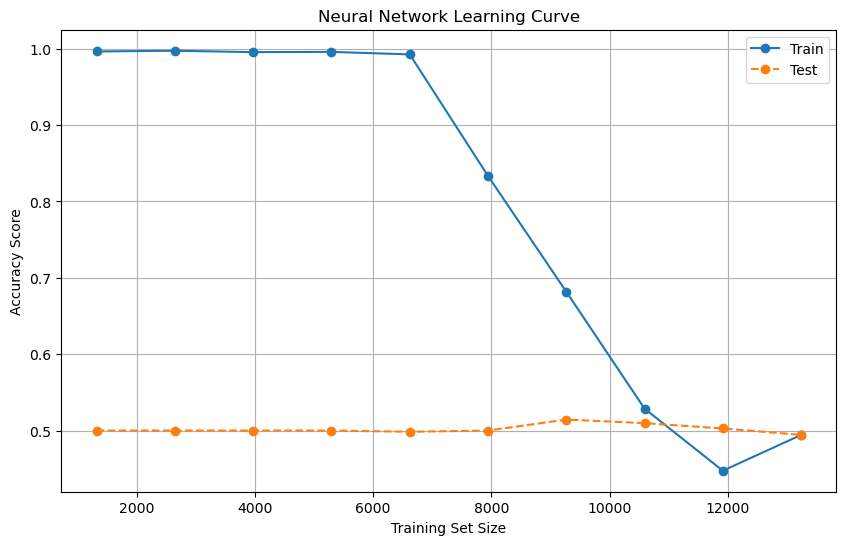

Neural Network Accuracy Score on Test Set: 0.9957884885353299


In [32]:
param_grid_nn = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                 'activation': ['relu', 'tanh', 'logistic'],
                 'alpha': [0.0001, 0.001, 0.01]}

# Create Neural Network model
nn_model = MLPClassifier()

# Perform GridSearchCV
grid_search_nn = GridSearchCV(nn_model, param_grid_nn, scoring='accuracy', cv=3)
grid_search_nn.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params_nn = grid_search_nn.best_params_

# Train the Neural Network model with the best parameters
nn_model_tuned = MLPClassifier(**best_params_nn)
nn_model_tuned.fit(X_train, y_train)

# Set the sizes for the learning curve
sizes, train_scores, test_scores = learning_curve(nn_model_tuned, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean accuracy scores for training and testing sets
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(sizes, train_scores_mean, label='Train', marker='o')
plt.plot(sizes, test_scores_mean, label='Test', marker='o', linestyle='dashed')

plt.title('Neural Network Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set using accuracy_score
nn_predictions = nn_model_tuned.predict(X_test)
accuracy = accuracy_score(y_test, nn_predictions)
print(f"Neural Network Accuracy Score on Test Set: {accuracy}")

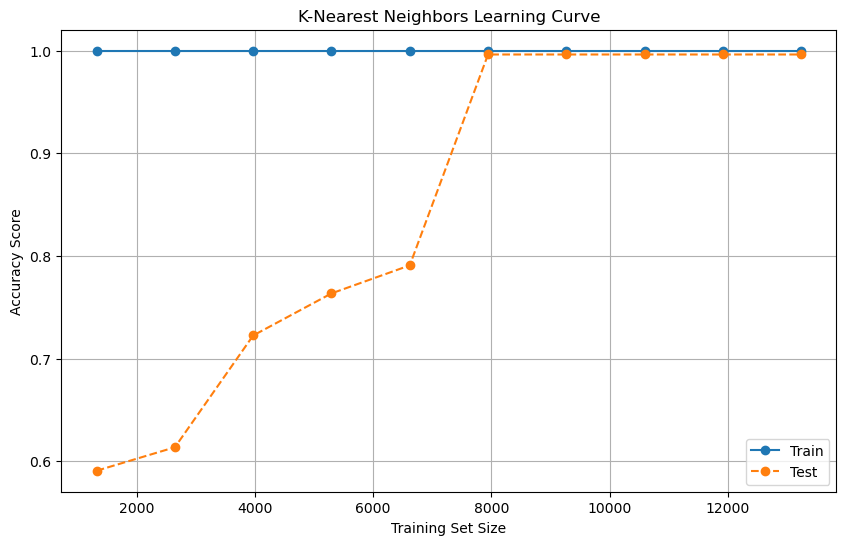

In [33]:
# Define the parameter grid for K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

# Create K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Perform GridSearchCV for K-Nearest Neighbors
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, scoring='accuracy', cv=3, n_jobs=-1)
grid_search_knn.fit(X_train_resampled, y_train_resampled)

# Get the best parameters for K-Nearest Neighbors
best_params_knn = grid_search_knn.best_params_

# Train the K-Nearest Neighbors model with the best parameters
knn_model_tuned = KNeighborsClassifier(**best_params_knn)
knn_model_tuned.fit(X_train, y_train)

# Set the sizes for the learning curve
sizes, train_scores, test_scores = learning_curve(knn_model_tuned, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean accuracy scores for training and testing sets
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(sizes, train_scores_mean, label='Train', marker='o')
plt.plot(sizes, test_scores_mean, label='Test', marker='o', linestyle='dashed')

plt.title('K-Nearest Neighbors Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

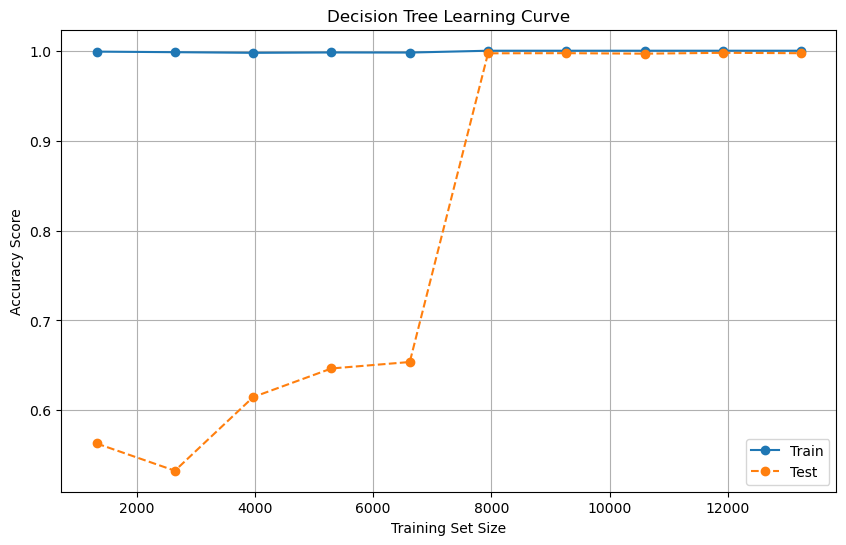

In [34]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Decision Tree model
dt_model = DecisionTreeClassifier()

# Perform GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, scoring='accuracy', cv=3, n_jobs=-1)
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Get the best parameters for Decision Tree
best_params_dt = grid_search_dt.best_params_

# Train the Decision Tree model with the best parameters
dt_model_tuned = DecisionTreeClassifier(**best_params_dt)
dt_model_tuned.fit(X_train, y_train)

# Set the sizes for the learning curve
sizes, train_scores, test_scores = learning_curve(dt_model_tuned, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean accuracy scores for training and testing sets
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(sizes, train_scores_mean, label='Train', marker='o')
plt.plot(sizes, test_scores_mean, label='Test', marker='o', linestyle='dashed')

plt.title('Decision Tree Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

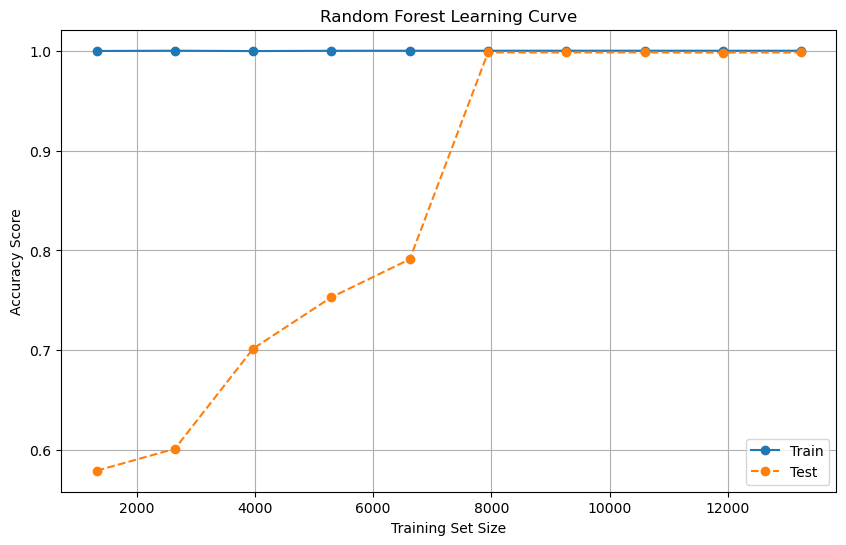

In [63]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create Random Forest model
rf_model = RandomForestClassifier()

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, scoring='accuracy', cv=3, n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_

# Train the Random Forest model with the best parameters
rf_model_tuned = RandomForestClassifier(**best_params_rf)
rf_model_tuned.fit(X_train, y_train)

# Set the sizes for the learning curve
sizes, train_scores, test_scores = learning_curve(rf_model_tuned, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean accuracy scores for training and testing sets
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(sizes, train_scores_mean, label='Train', marker='o')
plt.plot(sizes, test_scores_mean, label='Test', marker='o', linestyle='dashed')

plt.title('Random Forest Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
# Initialize an empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best Accuracy', 'F1 Score', 'Precision', 'Recall', 'Misclassification Rate'])

# K-Nearest Neighbors
best_params_knn = grid_search_knn.best_params_
y_pred_knn = knn_model_tuned.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
misclassification_rate_knn = calculate_misclassification_rate(y_test, y_pred_knn)

# Create a DataFrame for K-Nearest Neighbors results
knn_results = pd.DataFrame({
    'Model': ['K-Nearest Neighbors'],
    'Best Parameters': [best_params_knn],
    'Best Accuracy': [accuracy_knn],
    'F1 Score': [f1_knn],
    'Precision': [precision_knn],
    'Recall': [recall_knn],
    'Misclassification Rate': [misclassification_rate_knn]
})

# Concatenate the DataFrames
results_df = pd.concat([results_df, knn_results], ignore_index=True)

# Neural Network
nn_predictions = nn_model_tuned.predict(X_test)
accuracy_nn = accuracy_score(y_test, nn_predictions)
f1_nn = f1_score(y_test, nn_predictions)
precision_nn = precision_score(y_test, nn_predictions)
recall_nn = recall_score(y_test, nn_predictions)
misclassification_rate_nn = calculate_misclassification_rate(y_test, nn_predictions)

# Create a DataFrame for Neural Network results
nn_results = pd.DataFrame({
    'Model': ['Neural Network'],
    'Best Parameters': [best_params_nn],
    'Best Accuracy': [accuracy_nn],
    'F1 Score': [f1_nn],
    'Precision': [precision_nn],
    'Recall': [recall_nn],
    'Misclassification Rate': [misclassification_rate_nn]
})

# Concatenate the DataFrames
results_df = pd.concat([results_df, nn_results], ignore_index=True)

# Decision Tree
y_pred_dt = dt_model_tuned.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
misclassification_rate_dt = calculate_misclassification_rate(y_test, y_pred_dt)

# Create a DataFrame for Decision Tree results
dt_results = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Best Parameters': [best_params_dt],
    'Best Accuracy': [accuracy_dt],
    'F1 Score': [f1_dt],
    'Precision': [precision_dt],
    'Recall': [recall_dt],
    'Misclassification Rate': [misclassification_rate_dt]
})

# Concatenate the DataFrames
results_df = pd.concat([results_df, dt_results], ignore_index=True)

# Random Forest
y_pred_rf = rf_model_tuned.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
misclassification_rate_rf = calculate_misclassification_rate(y_test, y_pred_rf)

# Create a DataFrame for Random Forest results
rf_results = pd.DataFrame({
    'Model': ['Random Forest'],
    'Best Parameters': [best_params_rf],
    'Best Accuracy': [accuracy_rf],
    'F1 Score': [f1_rf],
    'Precision': [precision_rf],
    'Recall': [recall_rf],
    'Misclassification Rate': [misclassification_rate_rf]
})

# Concatenate the DataFrames
results_df = pd.concat([results_df, rf_results], ignore_index=True)

# Display the results DataFrame
results_df

C:\Users\Ng Jun Ming\AppData\Local\Temp\ipykernel_7160\2851753159.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, knn_results], ignore_index=True)
C:\Users\Ng Jun Ming\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Best Parameters,Best Accuracy,F1 Score,Precision,Recall,Misclassification Rate
0,K-Nearest Neighbors,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",0.994385,0.0,0.0,0.0,0.005615
1,Neural Network,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.995788,0.0,0.0,0.0,0.004212
2,Decision Tree,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.992981,0.0,0.0,0.0,0.007019
3,Random Forest,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.992513,0.0,0.0,0.0,0.007487


In [39]:
def calculate_misclassification_rate(y_true, y_pred):
    misclassified = np.sum(y_true != y_pred)
    total_samples = len(y_true)
    misclassification_rate = misclassified / total_samples
    return misclassification_rate

# 7. Validation and Evaluation<a id='validation'></a>

[Back to top](#table_of_contents)

### Evaluation Metrics Explanation:

1. **F1 Score:**
   - The F1 Score is the harmonic mean of precision and recall. It's useful in binary classification with uneven class distribution.
   - Formula: \( F1 = 2 \times \left( \frac{{\text{{Precision}} \times \text{{Recall}}}}{{\text{{Precision}} + \text{{Recall}}}} \right) \)
   - Ranges from 0 to 1, with 1 being the best. Balances precision and recall.

2. **Precision:**
   - Precision is the ratio of correctly predicted positive observations to total predicted positives.
   - Formula: \( \text{{Precision}} = \frac{{\text{{True Positives}}}}{{\text{{True Positives}} + \text{{False Positives}}}} \)
   - Indicates accuracy of positive predictions.

3. **Recall:**
   - Recall is the ratio of correctly predicted positive observations to all actual positives.
   - Formula: \( \text{{Recall}} = \frac{{\text{{True Positives}}}}{{\text{{True Positives}} + \text{{False Negatives}}}} \)
   - Measures the ability to capture all positive instances.

4. **Misclassification Rate:**
   - The Misclassification Rate is the ratio of incorrectly predicted instances to the total instances.
   - Formula: \( \text{{Misclassification Rate}} = \frac{{\text{{False Positives}} + \text{{False Negatives}}}}{{\text{{Total Instances}}}} \)
   - A lower rate indicates better performance but doesn't distinguish between false positives and false negatives.

In [132]:
sorted_results = results_df.sort_values(by='Best Accuracy', ascending=False)
best_model_info = results_df.loc[results_df['Best Accuracy'].idxmax()]
best_model_info


Model                                                        Neural Network
Best Parameters           {'activation': 'relu', 'alpha': 0.01, 'hidden_...
Best Accuracy                                                      0.995788
F1 Score                                                                0.0
Precision                                                               0.0
Recall                                                                  0.0
Misclassification Rate                                             0.004212
Name: 1, dtype: object

In [74]:
# Assuming your DataFrame is named results_df
knn_row = results_df.loc[results_df['Model'] == 'K-Nearest Neighbors']

# Extract parameters for K-Nearest Neighbors
knn_params = knn_row['Best Parameters'].values[0]

knn_best_model = KNeighborsClassifier(**knn_params)

# Train the best model on the entire training set
knn_best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_knn_best_model = knn_best_model.predict(X_valid)

# Evaluate the best model
accuracy_knn_best_modell = accuracy_score(y_valid, y_pred_best_model)
f1_knn_best_model = f1_score(y_valid, y_pred_best_model)
precision_knn_best_model = precision_score(y_valid, y_pred_best_model)
recall_knn_best_model = recall_score(y_valid, y_pred_best_model)
misclassification_rate_knn_best_model = calculate_misclassification_rate(y_valid, y_pred_best_model)

# Display evaluation metrics for the best model
print("\nEvaluation Metrics for the Best KNN:")
print(f"Accuracy: {accuracy_knn_best_modell:.4f}")
print(f"F1 Score: {f1_knn_best_model:.4f}")
print(f"Precision: {precision_knn_best_model:.4f}")
print(f"Recall: {recall_knn_best_model:.4f}")
print(f"Misclassification Rate: {misclassification_rate_knn_best_model:.4f}")


Evaluation Metrics for the Best KNN:
Accuracy: 0.9930
F1 Score: 0.4000
Precision: 0.4167
Recall: 0.3846
Misclassification Rate: 0.0070


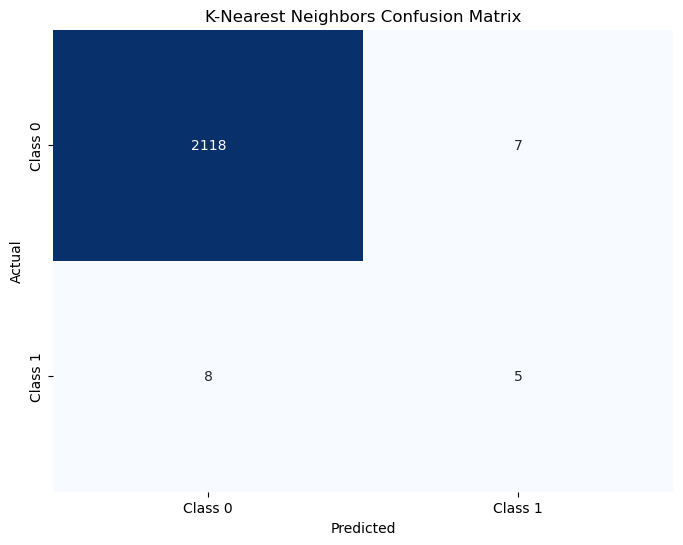

In [75]:
# Compute the confusion matrix for K-Nearest Neighbors
conf_matrix_knn_best_model = confusion_matrix(y_valid, y_pred_knn_best_model)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn_best_model, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
# Locate the row for the Neural Network in the DataFrame
nn_row = results_df.loc[results_df['Model'] == 'Neural Network']

# Extract parameters for the Neural Network
nn_params = nn_row['Best Parameters'].values[0]

# Initialize MLPClassifier with the best parameters
nn_best_model = MLPClassifier(**nn_params)

# Train the best model on the entire training set
nn_best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
y_pred_nn_best_model = nn_best_model.predict(X_valid)

# Evaluate the best model
accuracy_nn_best_model = accuracy_score(y_valid, y_pred_nn_best_model)
f1_nn_best_model = f1_score(y_valid, y_pred_nn_best_model, zero_division=1)
precision_nn_best_model = precision_score(y_valid, y_pred_nn_best_model, zero_division=1)
recall_nn_best_model = recall_score(y_valid, y_pred_nn_best_model, zero_division=1)
misclassification_rate_nn_best_model = calculate_misclassification_rate(y_valid, y_pred_nn_best_model)

# Display evaluation metrics for the best model
print("\nEvaluation Metrics for the Best Neural Network Model:")
print(f"Accuracy: {accuracy_nn_best_model:.4f}")
print(f"F1 Score: {f1_nn_best_model:.4f}")
print(f"Precision: {precision_nn_best_model:.4f}")
print(f"Recall: {recall_nn_best_model:.4f}")
print(f"Misclassification Rate: {misclassification_rate_nn_best_model:.4f}")



Evaluation Metrics for the Best Neural Network Model:
Accuracy: 0.0412
F1 Score: 0.0125
Precision: 0.0063
Recall: 1.0000
Misclassification Rate: 0.9588


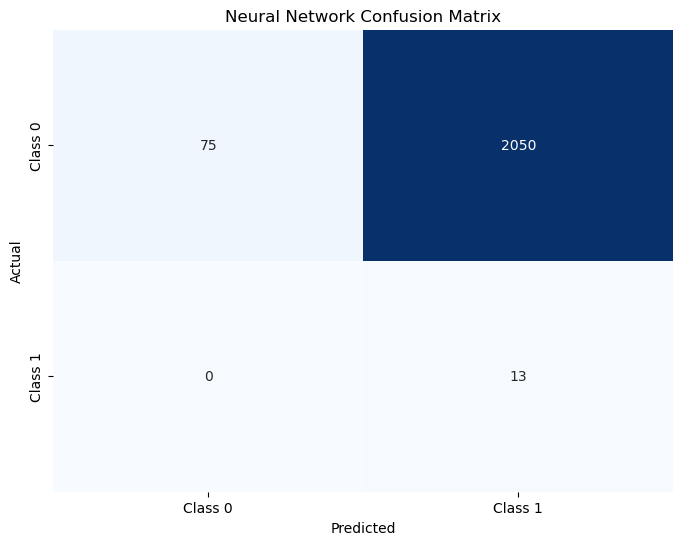

In [69]:
# Compute the confusion matrix for Neural Network
conf_matrix_nn_best_model = confusion_matrix(y_valid, y_pred_nn_best_model)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn_best_model, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
# Locate the row for the Decision Tree in the DataFrame
dt_row = results_df.loc[results_df['Model'] == 'Decision Tree']

# Extract parameters for the Decision Tree
dt_params = dt_row['Best Parameters'].values[0]

# Initialize DecisionTreeClassifier with the best parameters
dt_best_model = DecisionTreeClassifier(**dt_params)

# Train the best model on the entire training set
dt_best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
y_pred_dt_best_model = dt_best_model.predict(X_valid)

# Evaluate the best model
accuracy_dt_best_model = accuracy_score(y_valid, y_pred_dt_best_model)
f1_dt_best_model = f1_score(y_valid, y_pred_dt_best_model, zero_division=1)
precision_dt_best_model = precision_score(y_valid, y_pred_dt_best_model, zero_division=1)
recall_dt_best_model = recall_score(y_valid, y_pred_dt_best_model, zero_division=1)
misclassification_rate_dt_best_model = calculate_misclassification_rate(y_valid, y_pred_dt_best_model)

# Display evaluation metrics for the best model
print("\nEvaluation Metrics for the Best Decision Tree Model:")
print(f"Accuracy: {accuracy_dt_best_model:.4f}")
print(f"F1 Score: {f1_dt_best_model:.4f}")
print(f"Precision: {precision_dt_best_model:.4f}")
print(f"Recall: {recall_dt_best_model:.4f}")
print(f"Misclassification Rate: {misclassification_rate_dt_best_model:.4f}")


Evaluation Metrics for the Best Decision Tree Model:
Accuracy: 0.9916
F1 Score: 0.1818
Precision: 0.2222
Recall: 0.1538
Misclassification Rate: 0.0084


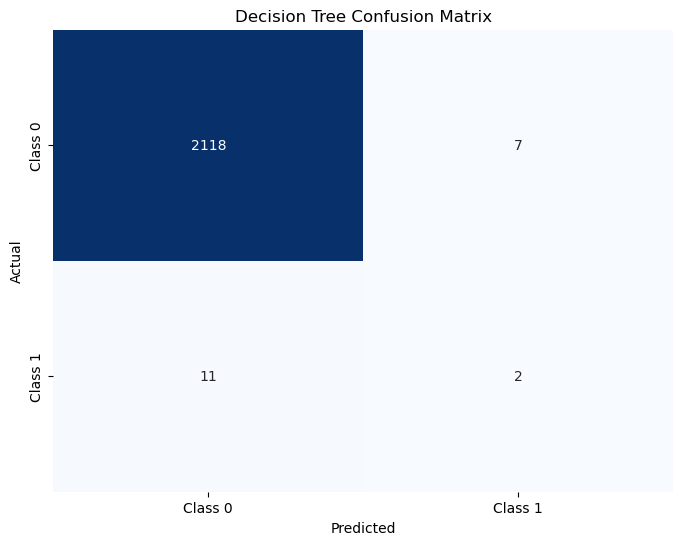

In [71]:
# Compute the confusion matrix for Decision Tree
conf_matrix_dt_best_model = confusion_matrix(y_valid, y_pred_dt_best_model)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_best_model, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [72]:
# Locate the row for the Random Forest in the DataFrame
rf_row = results_df.loc[results_df['Model'] == 'Random Forest']

# Extract parameters for the Random Forest
rf_params = rf_row['Best Parameters'].values[0]

# Initialize RandomForestClassifier with the best parameters
rf_best_model = RandomForestClassifier(**rf_params)

# Train the best model on the entire training set
rf_best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
y_pred_rf_best_model = rf_best_model.predict(X_valid)

# Evaluate the best model
accuracy_rf_best_model = accuracy_score(y_valid, y_pred_rf_best_model)
f1_rf_best_model = f1_score(y_valid, y_pred_rf_best_model, zero_division=1)
precision_rf_best_model = precision_score(y_valid, y_pred_rf_best_model, zero_division=1)
recall_rf_best_model = recall_score(y_valid, y_pred_rf_best_model, zero_division=1)
misclassification_rate_rf_best_model = calculate_misclassification_rate(y_valid, y_pred_rf_best_model)

# Display evaluation metrics for the best model
print("\nEvaluation Metrics for the Best Random Forest Model:")
print(f"Accuracy: {accuracy_rf_best_model:.4f}")
print(f"F1 Score: {f1_rf_best_model:.4f}")
print(f"Precision: {precision_rf_best_model:.4f}")
print(f"Recall: {recall_rf_best_model:.4f}")
print(f"Misclassification Rate: {misclassification_rate_rf_best_model:.4f}")


Evaluation Metrics for the Best Random Forest Model:
Accuracy: 0.9935
F1 Score: 0.2222
Precision: 0.4000
Recall: 0.1538
Misclassification Rate: 0.0065


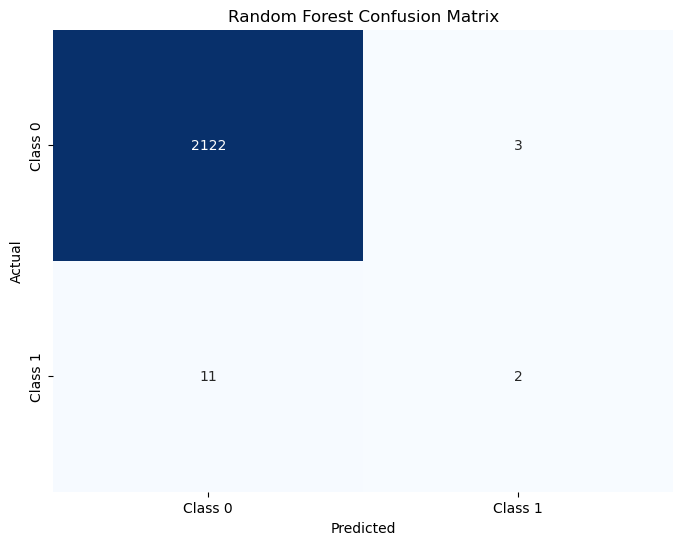

In [73]:
# Compute the confusion matrix
conf_matrix_rf_best_model = confusion_matrix(y_valid, y_pred_rf_best_model)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_best_model, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Since we want to help companies streamline the process of credit card approval, we are more interested in ensuring that the customer when applying is not wrongly classified to not approval when they are supposed to be approved, we have to make into account the recall so that we do not lose out on potential customers. However, we will also want to look at the precision to ensure that those who are supposed to be not approved do not get approved as they might default on their payment. To solve this issue, we will look at the harmonic mean of both precision and recall also known as the F1 score.

Out of all the models tuned, the best model with the highest F1 score is the K nearest neighbour (KNN). Thus we would recommend using the KNN model to predict whether one should be approved of the credit card or not.